In [1]:
# Creación aleatoria de datos
import numpy as np
import random
random.seed(42)

In [2]:
nivel_estudios = []
nivel_estudios.extend(['Secundaria']*110)
nivel_estudios.extend(['Bachillerato']*172)
nivel_estudios.extend(['Grado']*145)
nivel_estudios.extend(['Master']*52)
nivel_estudios.extend(['Doctorado']*21)

nivel_estudios = np.random.permutation(nivel_estudios)

In [3]:
print(nivel_estudios)

['Bachillerato' 'Master' 'Bachillerato' 'Grado' 'Bachillerato'
 'Bachillerato' 'Secundaria' 'Grado' 'Grado' 'Doctorado' 'Grado' 'Grado'
 'Master' 'Secundaria' 'Grado' 'Bachillerato' 'Grado' 'Secundaria'
 'Bachillerato' 'Secundaria' 'Grado' 'Bachillerato' 'Bachillerato'
 'Bachillerato' 'Grado' 'Secundaria' 'Grado' 'Grado' 'Doctorado' 'Grado'
 'Doctorado' 'Grado' 'Grado' 'Secundaria' 'Grado' 'Secundaria' 'Master'
 'Secundaria' 'Bachillerato' 'Grado' 'Bachillerato' 'Master'
 'Bachillerato' 'Grado' 'Bachillerato' 'Grado' 'Secundaria' 'Grado'
 'Master' 'Secundaria' 'Grado' 'Bachillerato' 'Bachillerato' 'Grado'
 'Secundaria' 'Bachillerato' 'Grado' 'Bachillerato' 'Secundaria' 'Master'
 'Grado' 'Grado' 'Bachillerato' 'Secundaria' 'Doctorado' 'Bachillerato'
 'Grado' 'Bachillerato' 'Bachillerato' 'Bachillerato' 'Bachillerato'
 'Bachillerato' 'Grado' 'Master' 'Master' 'Bachillerato' 'Secundaria'
 'Bachillerato' 'Bachillerato' 'Bachillerato' 'Grado' 'Bachillerato'
 'Secundaria' 'Grado' 'Secundaria

In [4]:
# DIAGRAMA DE BARRAS
import matplotlib.pyplot as plt
import numpy as np
estudios, frecuencia = np.unique(nivel_estudios, return_counts=True)
print(estudios, frecuencia)

['Bachillerato' 'Doctorado' 'Grado' 'Master' 'Secundaria'] [172  21 145  52 110]


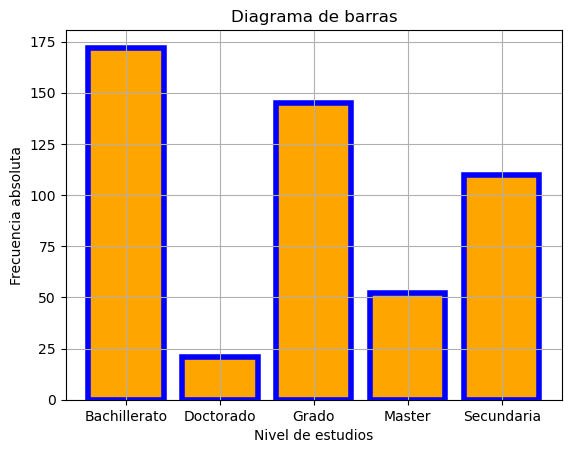

In [5]:
plt.ylabel('Frecuencia absoluta')
plt.xlabel('Nivel de estudios')
plt.title('Diagrama de barras')
plt.bar(estudios, frecuencia, color='orange', edgecolor='blue', linewidth=4) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
plt.grid()
plt.show()

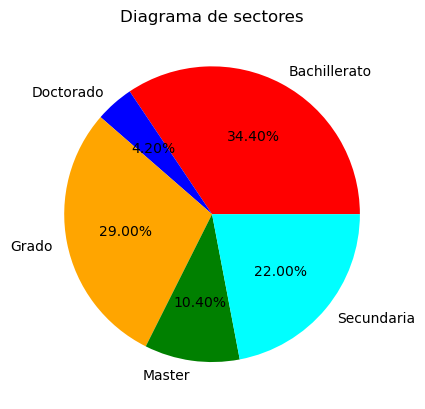

In [6]:
# DIAGRAMA DE SECTORES
colores = {'red', 'blue', 'orange', 'green', 'cyan'}
plt.pie(frecuencia, labels=estudios, colors=colores, autopct='%1.2f%%')
plt.title('Diagrama de sectores')
plt.show()

In [1]:
# Creación aleatoria de datos
import numpy as np
X = np.array([0.5, 23, 0.3, 4.5, 0.3, 0.5,
              -28, -50, 60, -100, -10, -11, 13, 19, 1, 9])

In [2]:
# Medidas de tendencia central
from scipy import stats

media = np.mean(X)
mediana = np.median(X)
moda, _ = stats.mode(X)
print('media: ', media)
print('mediana: ', mediana)
print('moda :', moda[0])

media:  -4.24375
mediana:  0.5
moda : 0.3


C:\Users\julis\AppData\Local\Temp\ipykernel_25084\1173900702.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda, _ = stats.mode(X)


In [3]:
# Medidas de posición
import numpy as np
import matplotlib.pyplot as plt

Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
RIC = Q3 - Q1
lim_inf = Q1 - 1.5*RIC
lim_sup = Q3 + 1.5*RIC

print('RIC :', RIC)
print('limite inferior :', lim_inf)
print('limite superior :', lim_sup)

RIC : 20.25
limite inferior : -40.625
limite superior : 40.375


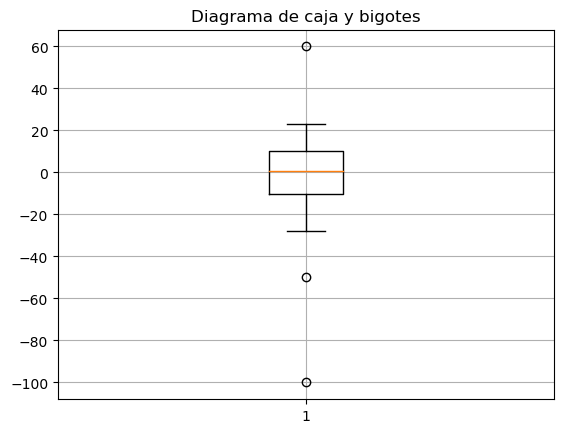

In [4]:
# Dibuja el diagrama de box and whiskers y determina visualmente el número de outliers
plt.boxplot(X)
plt.grid()
plt.title('Diagrama de caja y bigotes')
plt.show()

In [5]:
# Medidas de dispersión
desvest = np.std(X)
print('Desviación típica: ', desvest)
print('Varianza: ', desvest**2)

Desviación típica:  33.521242681880096
Varianza:  1123.6737109375


In [6]:
# Medidas de distribución
asimetria = stats.skew(X)
curtosis = stats.kurtosis(X, fisher=False) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
print('Asimetría ', np.round(asimetria, 4))
print('Curtosis ', np.round(curtosis, 4))

if curtosis>0:
    print('Distribución Leptocúrtica')
elif curtosis<0:
    print('Distribución Platicúrtica')
else:
    print('Distribución Mesocúrtica')

Asimetría  -1.1302
Curtosis  5.2858
Distribución Leptocúrtica


In [7]:
# Cargar el set de datos de Iris
from sklearn import datasets
from pprint import pprint
iris = datasets.load_iris()
#pprint(iris)sep

In [8]:
# Extraer datos y target
X = iris.data
y = iris.target

# ¿Qué tipo de asimetría se observa en la variable "longitud del pétalo"?
# Extraer las medidas de distribución de la longitud del pétalo
petal_len = X[:,2]
asimetria = stats.skew(petal_len)
print(asimetria)

# ¿A qué tipo de distribución se ajusta la variable "ancho del sépalo", según su curtosis?
sepal_width = X[:,1]
curtosis = stats.kurtosis(sepal_width, fisher=True)
print(curtosis)

-0.2721276664567214
0.18097631752246768


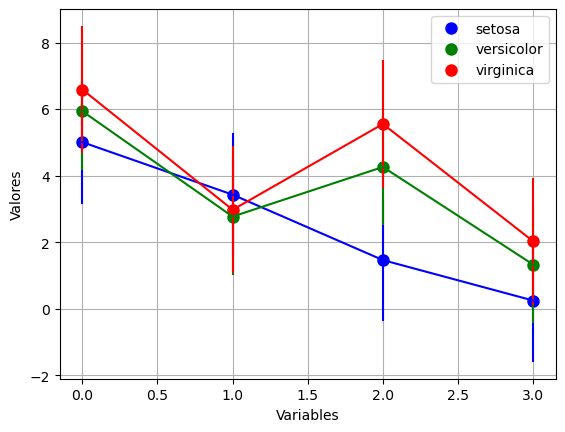

In [9]:
# EJERCICIO EXTRA SOBRE EL DATASET DE IRIS
# Extraer la media y la desviación típica de cada variable en función de la clase y representarlo en un gráfico (plt.errorbar)
colors=['blue', 'green', 'red']
for k in range(3): # 3 classes
    data_clase = X[y==k]
    mean_class = np.mean(data_clase, axis=0)
    desv_class = np.std(data_clase)
    col = ''.join(['o', colors[k][0]])
    plt.plot(range(4), mean_class, col, markersize=8, linewidth=5)
    plt.errorbar(range(4), mean_class, yerr=desv_class, color=colors[k])
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.grid()
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

Image dimensions:  (256, 256, 3)


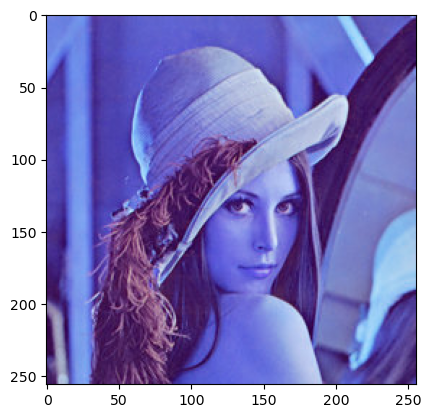

In [5]:
# READ AN IMAGE
# pip install opencv-python
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread('images/Lena_RGB.png')
print('Image dimensions: ', np.shape(img))

plt.imshow(img, cmap='gray')
plt.show()

In [6]:
# Extraer por separado la imagen de grises de cada canal
R = img[:,:,2]
G = img[:,:,1]
B = img[:,:,0]

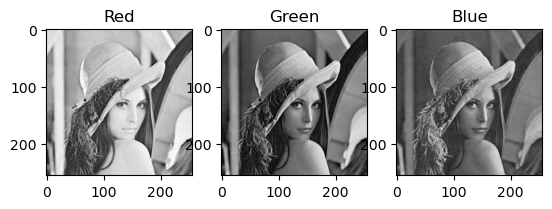

In [7]:
# Visualizar los canales en un subplot
fig, ax = plt.subplots(1,3)
ax[0].imshow(R, cmap='gray'), ax[0].set_title('Red')
ax[1].imshow(G, cmap='gray'), ax[1].set_title('Green')
ax[2].imshow(B, cmap='gray'), ax[2].set_title('Blue')
plt.show()

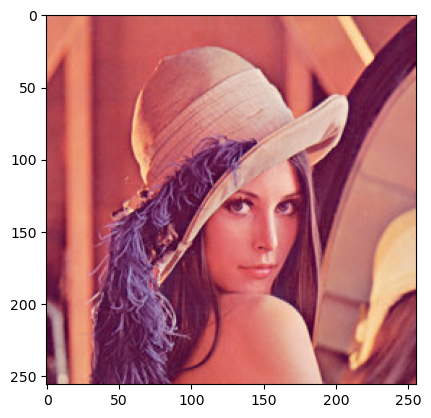

In [8]:
# Convertir BGR en RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, cmap='gray')
plt.show()

### TRANSFORMACIONES DE INTENSIDAD

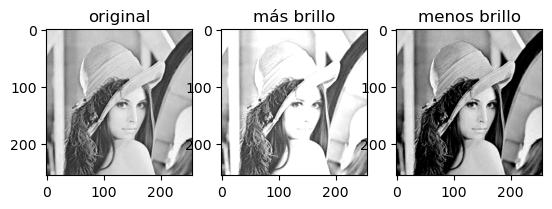

In [9]:
# CAMBIO DE BRILLO
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,2] # red color

mas_brillo = 50
menos_brillo = -100
mas_brillo_img = cv2.add(img, mas_brillo) # Importante el "cv2.add" en vez de "+"
menos_brillo_img = cv2.add(img, menos_brillo)

fig, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mas_brillo_img, cmap='gray'), ax[1].set_title('más brillo')
ax[2].imshow(menos_brillo_img, cmap='gray'), ax[2].set_title('menos brillo')
plt.show()

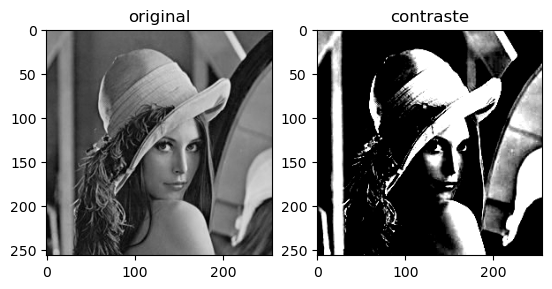

In [10]:
# CAMBIO DE CONTRASTE de acuerdo con el programa GIMP
img = cv2.imread('images/Lena_RGB.png')
img = img[:,:,1] # canal verde

contraste = 100

f = 131*(contraste + 127)/(127*(131-contraste))
alpha_c = f
gamma_c = 127*(1-f)

contrast_img = cv2.addWeighted(img, alpha_c, img, 0, gamma_c)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255), ax[0].set_title('original')
ax[1].imshow(contrast_img, cmap='gray', vmin=0, vmax=255), ax[1].set_title('contraste')
plt.show()

### CONVERSIONES DEL ESPACIO DE COLOR

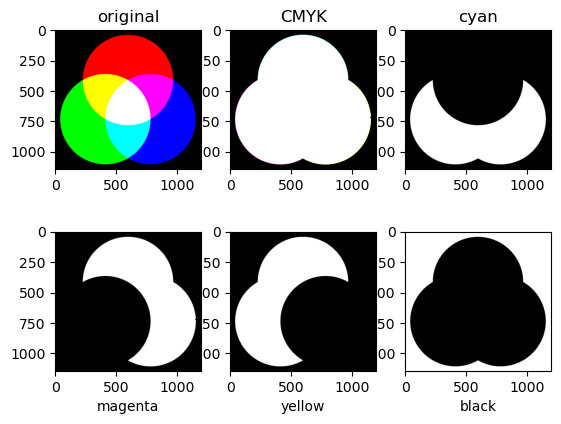

In [11]:
# RGB to CMYK
import numpy as np
from skimage import io

img = io.imread('images/colores.png')
rgb = img.copy()
rgb_p = rgb.astype('uint8')/255

with np.errstate(invalid='ignore', divide='ignore'):
    K = 1 - np.max(rgb_p, axis=2)
    C = (1-rgb_p[:,:,0] - K)/(1-K)
    M = (1-rgb_p[:,:,1] - K)/(1-K)
    Y = (1-rgb_p[:,:,2] - K)/(1-K)

CMYK = (np.dstack((C,M,Y,K))*255).astype(np.uint8)
C,M,Y,K = cv2.split(CMYK)

fig, ax = plt.subplots(2,3)
ax[0,0].imshow(img, cmap='gray'), ax[0,0].set_title('original')
ax[0,1].imshow(CMYK.astype('uint8'), cmap='gray'), ax[0,1].set_title('CMYK')
ax[0,2].imshow(C.astype('uint8'), cmap='gray'), ax[0,2].set_title('cyan')
ax[1,0].imshow(M.astype('uint8'), cmap='gray'), ax[1,0].set_xlabel('magenta')
ax[1,1].imshow(Y.astype('uint8'), cmap='gray'), ax[1,1].set_xlabel('yellow')
ax[1,2].imshow(K.astype('uint8'), cmap='gray'), ax[1,2].set_xlabel('black')
plt.show()

In [12]:
# Otras conversiones

img = cv2.imread('images/Lena_RGB.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray-scale

HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # (H)ue, (S)aturation and (V)alue

Lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab) # (L)uminosidad, a-b colores complementarios

YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) # Y-Luma, Cr-Cb crominancia rojo y azul


### TRANSFORMACIONES GEOMÉTRICAS

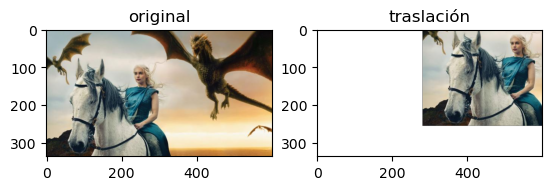

In [13]:
# TRASLACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape
 
M = np.float32([[1,0,280],[0,1,-80]]) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('traslación')
plt.show()

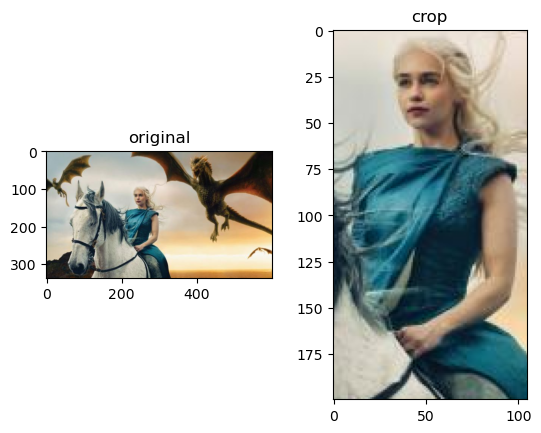

In [14]:
# CROPPING
img = io.imread('images/GOT.png')

new_img = img[90:290, 200:305]

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('crop')
plt.show()

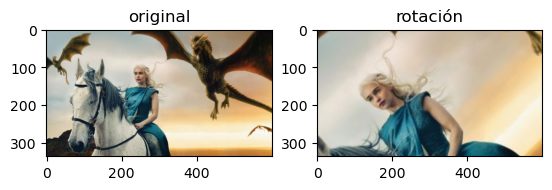

In [15]:
# ROTACIÓN
img = io.imread('images/GOT.png')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=2) # Defino la matriz de transformación
new_img = cv2.warpAffine(img,M,(cols,rows)) # Aplico la transformación

figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_img, cmap='gray'), ax[1].set_title('rotación')
plt.show()

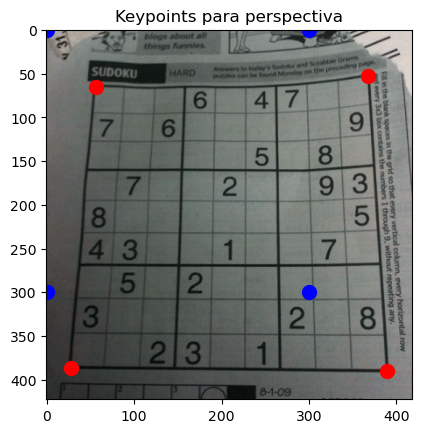

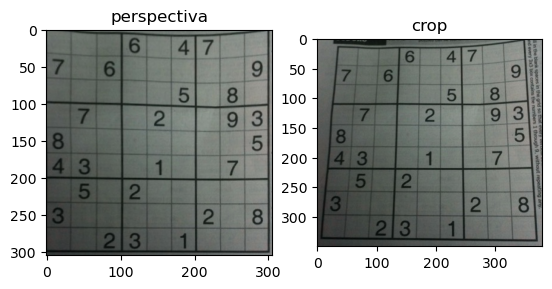

In [16]:
# PERSPECTIVA
img = cv2.imread('images/sudoku.png')
rows, cols, ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

plt.imshow(img, cmap='gray')
for i in range(0,4):
    plt.plot(pts1[i,0], pts1[i,1], 'or', markersize=10)
    plt.plot(pts2[i,0], pts2[i,1], 'ob', markersize=10)
plt.title('Keypoints para perspectiva')
plt.show()
 
M = cv2.getPerspectiveTransform(pts1,pts2) # Defino la matriz de transformación
pers = cv2.warpPerspective(img,M,(305,305)) # Aplico la transformación
crop =  img[50:400,20:400]

figs, ax = plt.subplots(1,2)
ax[0].imshow(pers, cmap='gray'), ax[0].set_title('perspectiva')
ax[1].imshow(crop, cmap='gray'), ax[1].set_title('crop')
plt.show()


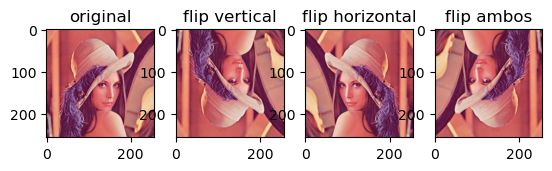

In [17]:
# FLIPPING
img = io.imread('images/Lena_RGB.png')
  
flipVertical = cv2.flip(img, 0)
flipHorizontal = cv2.flip(img, 1)
flipBoth = cv2.flip(img, -1)
 
figs, ax = plt.subplots(1,4)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(flipVertical, cmap='gray'), ax[1].set_title('flip vertical')
ax[2].imshow(flipHorizontal, cmap='gray'), ax[2].set_title('flip horizontal')
ax[3].imshow(flipBoth, cmap='gray'), ax[3].set_title('flip ambos')
plt.show()

### SEGMENTACIÓN MEDIANTE THRESHOLDING

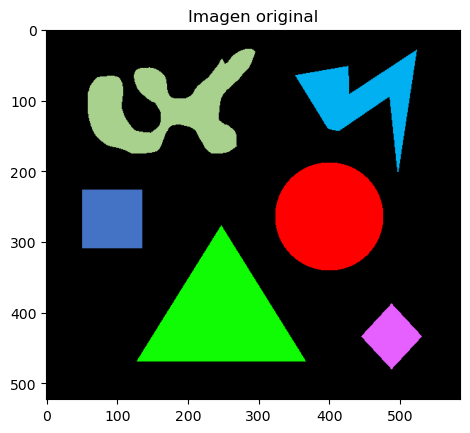

In [1]:
import matplotlib.pyplot as plt
import cv2

# Read an image
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

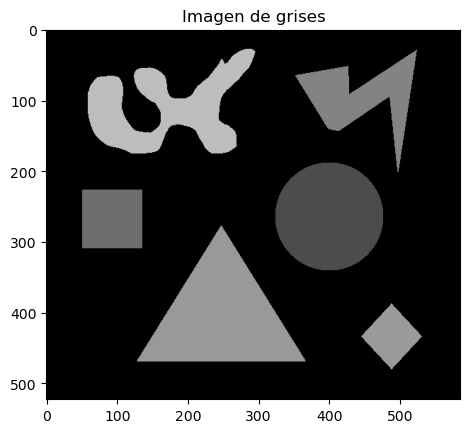

In [2]:
# Convertimos la imagen a escala de grises
import numpy as np
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.imread('figuras.png', 0) # Una forma de leer la imagen directamente en escala de grises

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

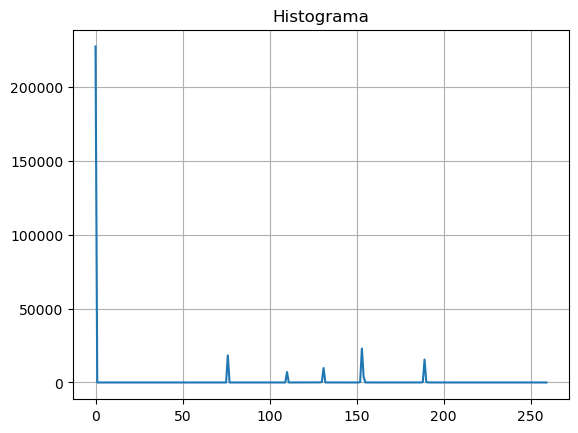

In [3]:
# Calculamos el histograma
hist = cv2.calcHist([gray_img], [0], None, [260], [0, 260]) # [0] son los canales, None la máscara

plt.plot(hist)
plt.grid()
plt.title('Histograma')
plt.show()

# Otra forma de mostrar el histograma (solo visualización)
# plt.hist(gray_img.ravel(), bins=50)
# plt.grid(True)
# plt.show()

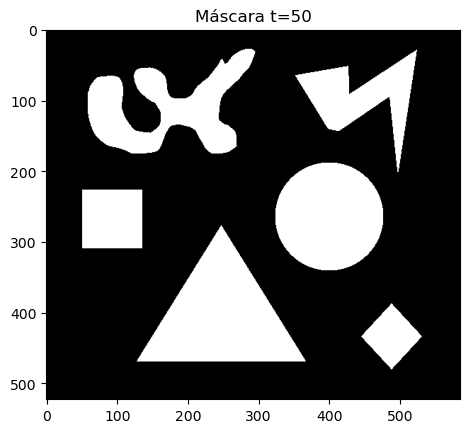

[  0 255]


In [4]:
# Fijamos el umbral en base al histograma anterior
t = 50

# Extreaemos la máscara binaria
maxim = 255
_, mask = cv2.threshold(gray_img, t, maxim, cv2.THRESH_BINARY)

# Otra formas de extraer la máscara 
# mask = gray_img.copy()
# mask = mask>t

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('Máscara t=' + str(t))
plt.show()

print(np.unique(mask)) # Atent@s a los formatos (bool, uint8, etc.)

[0 1]


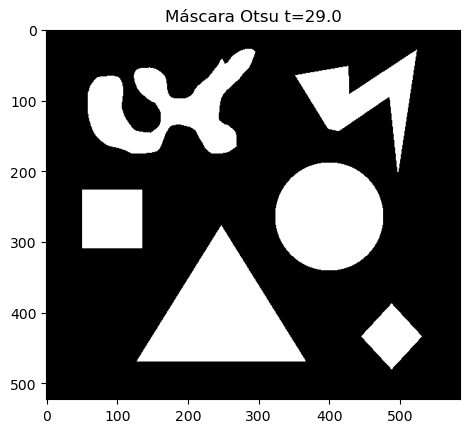

In [5]:
# Fijamos el umbral con el método de OTSU
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor máximo de la máscara
print(np.unique(mask))

# Visualizamos para corroborar que se obtiene el mismo resultado
plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

### SEGMENTACIÓN MEDIANTE CONVERSIONES DE COLOR

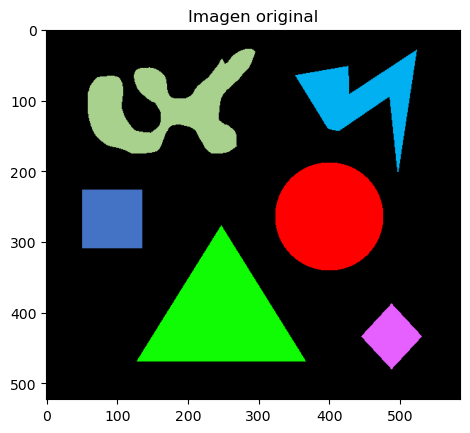

In [6]:
# Imaginamos que queremos segmentar únicamente el círculo
img = cv2.imread('images/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

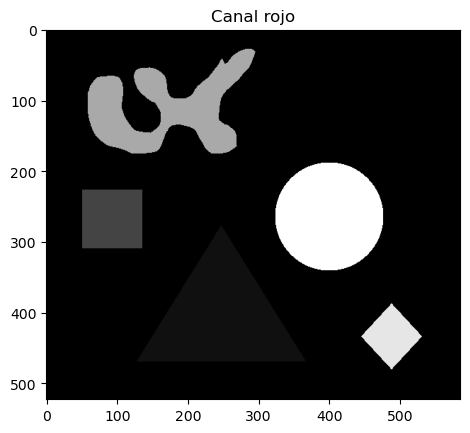

In [7]:
# Obtenemos el canal rojo
R = img[:,:,2]

plt.imshow(R, cmap='gray')
plt.title('Canal rojo')
plt.show()

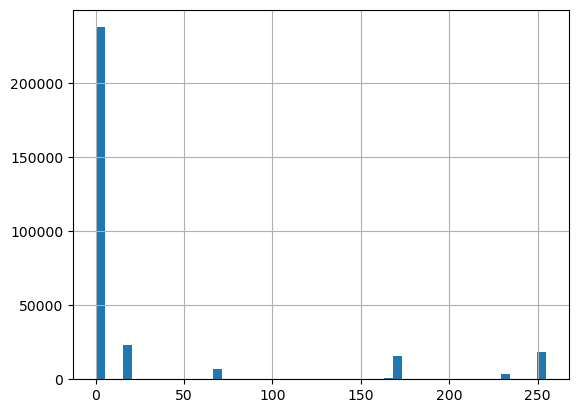

255


In [8]:
# Observamos el histograma
plt.hist(R.ravel(), bins=50)
plt.grid(True)
plt.show()
print(np.max(R))

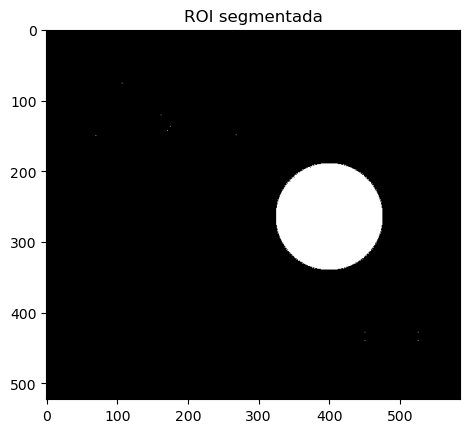

In [9]:
# Fijamos el umbral y extraemos la máscara
t=np.max(R)
mask = R.copy()
mask[mask<t] = 0

plt.imshow(mask, cmap='gray')
plt.title('ROI segmentada')
plt.show()

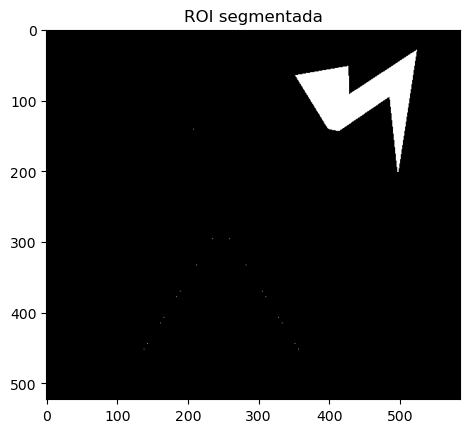

In [10]:
# Ejercicio individual
# Obtener una máscara con la imagen del rayo azul mediante segmentación por espacio de color

# Función para extraer los colores secundarios
def convert_to_CMYK(rgb_p):
    with np.errstate(invalid='ignore', divide='ignore'):
        K = 1 - np.max(rgb_p, axis=2)
        C = (1-rgb_p[:,:,0] - K)/(1-K)
        M = (1-rgb_p[:,:,1] - K)/(1-K)
        Y = (1-rgb_p[:,:,2] - K)/(1-K)
    CMYK = (np.dstack((C,M,Y,K))*255).astype('uint8')
    return CMYK

# Leer la imagen 
img = cv2.imread('images/figuras.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_p = rgb.astype('uint8')/255

# Extraer los colores secundarios
CMYK = convert_to_CMYK(rgb_p) 

# Extraer los canales por separado
C,M,Y,K = cv2.split(CMYK)

# Calcular la máscara del color cyan
t=np.max(C) 
mask = C.astype('uint8').copy()
mask[mask<t] = 0

# Visualizar la máscara
plt.imshow(mask, cmap='gray')
plt.title('ROI segmentada')
plt.show()

### SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES

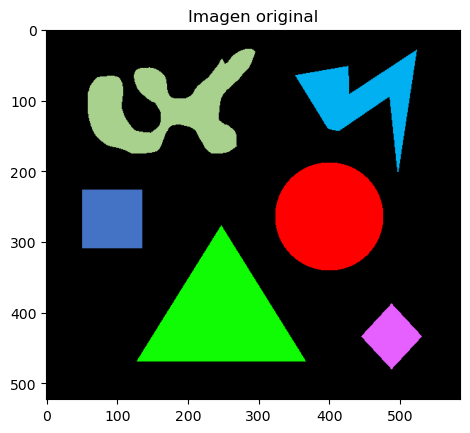

In [11]:
# SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES
img = cv2.imread('images/figuras.png')
# img = cv2.imread('images/Lena_rgb.png') # Probar a cargar otra imagen para la detección de bordes
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

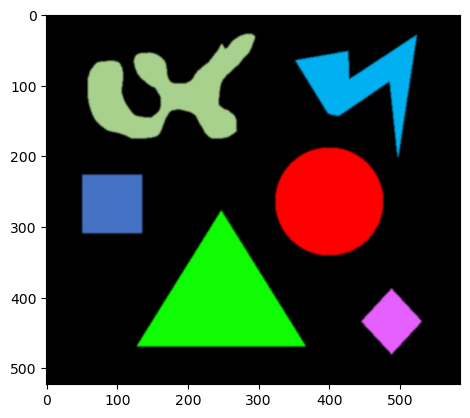

In [13]:
# Aplicamos un filtro gaussiano para emborronar las altas frecuencias
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 0) # (5x5) es el tamaño del filtro y 0 es la desviación estándar
plt.imshow(img_gaus, cmap='gray')
plt.show()

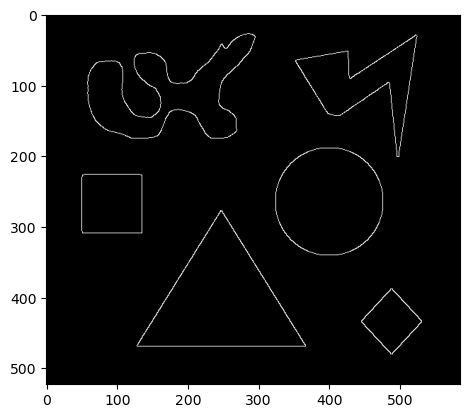

In [14]:
# Detección de bordes de Canny
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomienda que minValue sea 3 veces mayor que maxValue
kernel = np.ones((2,2), 'uint8')
#canny = cv2.dilate(canny, kernel, iterations=2)
#canny = cv2.erode(canny, kernel, iterations=2)

plt.imshow(canny, cmap='gray')
plt.show()

C:\Users\julis\AppData\Local\Temp\ipykernel_4652\2220132281.py:2: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes as bfh


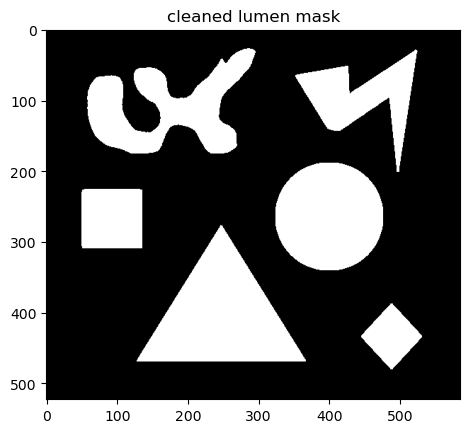

In [15]:
# Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('cleaned lumen mask')
plt.show()

### SEGMENTACIÓN POR CRECIMIENTO DE REGIONES (region growing)

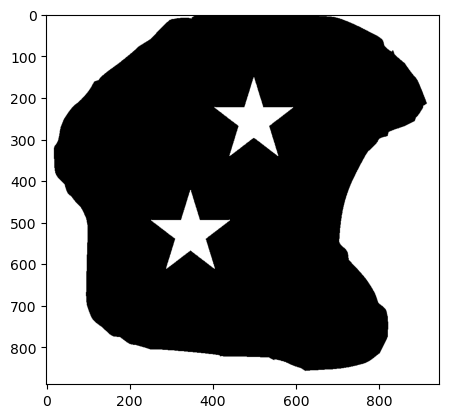

In [16]:
# Cargar imagen
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/estrellas.png', 0)

plt.imshow(img, cmap='gray')
plt.show()

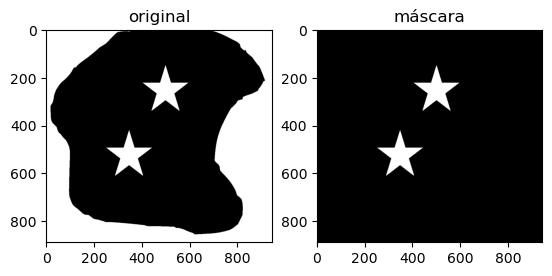

In [17]:
# Crear una copia de la imagen
mask = img.copy()

# Definir una imagen negra de referencia
h, w = img.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(mask, ref, (0,0), 0); # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('máscara')
plt.show()

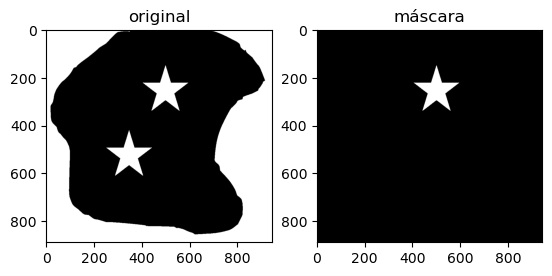

In [18]:
# Ejercicio extra - Crear una máscara con el método anterior de manera que solo la estrella de arriba sea blanca

# Crear una copia de la imagen
new_mask = mask.copy()

# Definir una imagen negra de referencia
h, w = new_mask.shape
ref = np.zeros((h+2, w+2), np.uint8)

# Fijar la semilla. En este caso en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(new_mask, ref, (350,500), 0); # Como nos interesa rellenar de negro, utilizamos el 0 en la última posición

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray'), ax[0].set_title('original')
ax[1].imshow(new_mask, cmap='gray'), ax[1].set_title('máscara')
plt.show()

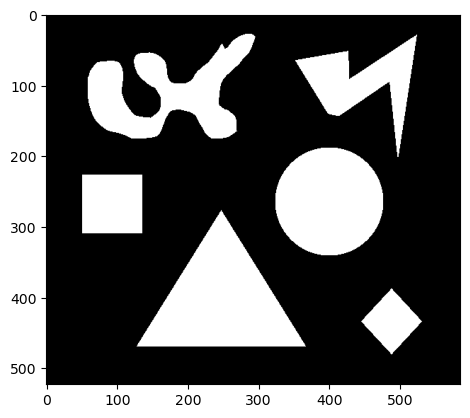

In [1]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('images/figuras.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.show()

número de objetos:  6
posibles valores de intensidad:  [0 1 2 3 4 5 6]


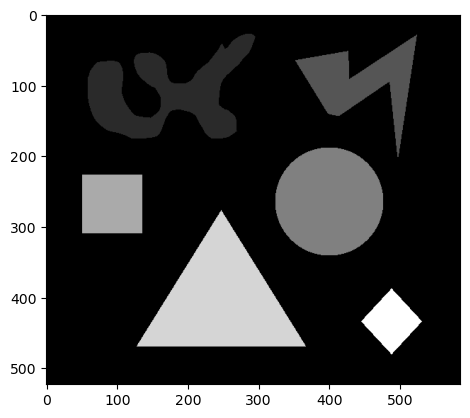

In [2]:
# Convertimos la imagen binaria en una imagen de etiquetas para tener acceso a cada objeto por separado
from skimage.measure import label

lab, num = label(mask, return_num=True)

# Importante:
# En 'num' devuelve 6 valores correspondientes a los 6 objetos que hay en la imagen.
# Sin embargo, 'lab' contiene hasta 7 valores diferentes, ya que también tiene en cuenta el fondo de la imagen.
print('número de objetos: ', num)
v,c = np.unique(lab, return_counts=True)
print('posibles valores de intensidad: ', v)

plt.imshow(lab, cmap='gray')
plt.show()

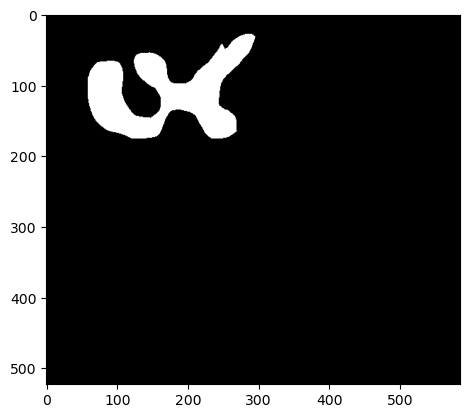

In [3]:
# Podemos acceder de manera independiente al objeto que nos interese a partir de su etiqueta correspondiente
objeto = lab == 1
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

(28, 59, 176, 296)


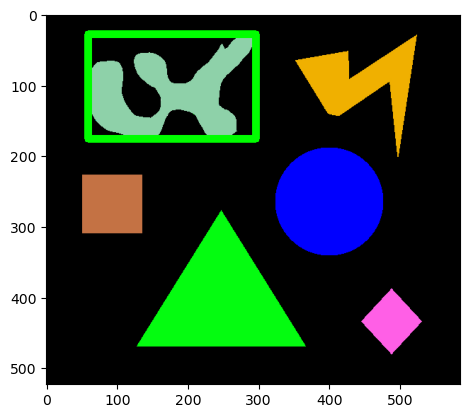

In [4]:
from skimage.measure import regionprops
# https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

# Después, podemos extraer la bounding box de dicho objeto
prop = regionprops(objeto)
bbox = prop[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img.copy(), start_point, end_point, (0, 255, 0), 10)
                     
plt.imshow(window, cmap='gray')
plt.show()

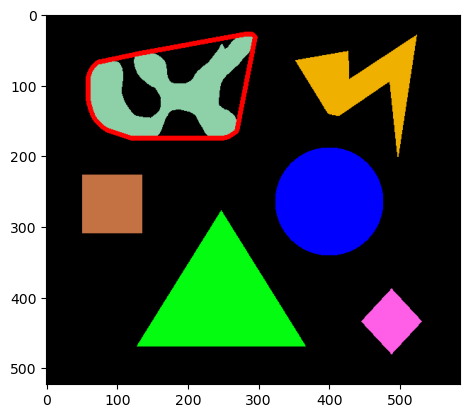

In [5]:
# Y la convex hull image
from skimage.morphology import convex_hull_image

convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')
# plt.imshow(convex_image, cmap='gray')
# plt.show()

conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Encontramos los contornos en una máscara 
imagen = cv2.drawContours(img.copy(), conts, -1, (255,0,0), 5) # Dibujamos los contornos
                     
plt.imshow(imagen, cmap='gray')
plt.show()

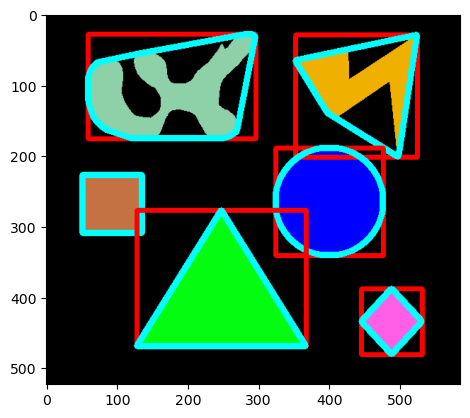

In [6]:
# Repetimos el proceso completo para todos los objetos de la imagen
imagen = img.copy()
for i in range(1, num+1): 
    objeto = lab == i
    objeto = objeto.astype('uint8')
    
    # bbox
    prop = regionprops(objeto)
    bbox = prop[0].bbox
    imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    
    # covex hull
    convex_image = convex_hull_image(objeto)
    convex_image = convex_image.astype('uint8')
    conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 8)

plt.imshow(imagen, cmap='gray')
plt.show()

In [7]:
# Vamos a extraer diferentes descriptores geométricos que nos ayudarán a caracterizar los objetos.
# pip install tabulate
from tabulate import tabulate
import math

new_lab, new_num = label(mask, return_num=True)

# Extraemos las característicias geométricas
headers = ['','Raro', 'Rayo', 'Círculo', 'Cuadrado', 'Triángulo', 'Rombo']
A,BB,CA,E,ED,EX,MA,MiA,OR,P,S,CO,R = ['area'], ['bbox_area'], ['convex_area'], ['eccentricity'], ['equiv_diameter'], \
['extent'], ['major_axis'], ['minor_axis'], ['orientation'], ['perimeter'], ['solidity'], ['compactness'], ['rectangularity']

for i in range(1,new_num+1):
    objeto = new_lab == i
    prop = regionprops(objeto.astype(np.uint8))
    
    A.append(np.round(prop[0].area, 4))
    BB.append(np.round(prop[0].bbox_area, 4))
    CA.append(np.round(prop[0].convex_area, 4))
    E.append(np.round(prop[0].eccentricity, 4))
    ED.append(np.round(prop[0].equivalent_diameter, 4))
    EX.append(np.round(prop[0].extent, 4))
    MA.append(np.round(prop[0].major_axis_length, 4))
    MiA.append(np.round(prop[0].minor_axis_length, 4))
    OR.append(np.round(prop[0].orientation, 4))
    P.append(np.round(prop[0].perimeter, 4))
    S.append(np.round(prop[0].solidity, 4))
    CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))
    R.append(np.round(prop[0].area/prop[0].bbox_area, 4))


my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO), tuple(R)]

print(tabulate(my_data, headers=headers))

                      Raro        Rayo     Círculo    Cuadrado    Triángulo      Rombo
--------------  ----------  ----------  ----------  ----------  -----------  ---------
area            16198       10282       18344        7055        23119       4018
bbox_area       35076       29756       23104        7055        46127       7998
convex_area     27405       16959       18488        7055        23307       4102
eccentricity        0.8556      0.7941      0           0.2157       0.371      0.3866
equiv_diameter    143.61      114.418     152.828      94.7771     171.569     71.5254
extent              0.4618      0.3455      0.794       1            0.5012     0.5024
major_axis        268.45      186.995     152.828      98.1428     195.774     76.1969
minor_axis        138.975     113.644     152.828      95.8332     181.801     70.2735
orientation        -1.4236      1.5298      0.7854      1.5708       1.5708     0
perimeter        1029.77      736.02      503.245     332      

In [2]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('images/photographer.png')

window = cv2.rectangle(img.copy(), (400,80), (420,100), (0, 0, 255), 5)
window = cv2.rectangle(window, (490,490), (510,510), (0, 255, 0), 5)
plt.imshow(window, cmap='gray')
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
# Seleccionamos una región del cielo y una de la hierba
cielo = img[80:100, 400:420]
hierba = img[490:510, 490:510]

fig, ax = plt.subplots(1,2)
ax[0].imshow(cielo, cmap='gray')
ax[0].set_title('cielo')
ax[1].imshow(hierba, cmap='gray')
ax[1].set_title('hierba')
plt.show()

### MATRIZ DE COOCURRENCIA

In [ ]:
# MATRIZ DE COOCURRENCIA (Gray-Level Cooccurence Matrix - GLCM)
from tabulate import tabulate
from skimage.feature import greycomatrix, greycoprops
headers = ['','cielo', 'hierba']
CN, DIS, H, ASM, E, COR = ['contraste'], ['disimilitud'], ['homogeneidad'], ['ASM'], ['Energía'], ['Correlación']

patches = []
patches.append(cielo)
patches.append(hierba)

for i in range(len(patches)):
    image = cv2.cvtColor(patches[i], cv2.COLOR_BGR2GRAY)
    GLCM = greycomatrix(image, distances=[5], angles=[0], levels=np.max(image)+1, symmetric=True, normed=True)
    plt.imshow(GLCM[:,:,0,0], cmap='gray')
    plt.show()
    CN.append(greycoprops(GLCM, 'contrast')[0,0])
    DIS.append(greycoprops(GLCM, 'dissimilarity')[0,0])
    H.append(greycoprops(GLCM, 'homogeneity')[0,0])
    ASM.append(greycoprops(GLCM, 'ASM')[0,0])
    E.append(greycoprops(GLCM, 'energy')[0,0])
    COR.append(greycoprops(GLCM, 'correlation')[0,0])

my_data = [tuple(CN), tuple(DIS), tuple(H), tuple(ASM), tuple(E), tuple(COR)]

print(tabulate(my_data, headers=headers))

### Scale-Invariant Feature Transform

In [ ]:
# SIFT algorithm
img = cv2.imread('images/photographer.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

# Imagen rotada
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle=45,scale=1)
img_rot = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(img_rot, cmap='gray')
plt.show()


In [ ]:
### PARA LA IMAGEN ORIGINAL

# Definición del algoritmo
sift = cv2.SIFT_create(nfeatures=0, nOctaveLayers = 3)

# Identificamos los puntos de interés
kp = sift.detect(img, None)

# Extraemos el descriptor para obtener el fingreprint
_, des = sift.compute(img, kp)
print(np.shape(des))
# print(des) # Matriz donde las filas son los keypoints y las columnas las características de dichos puntos clave

# Visualizamos los puntos de interés
img_int=cv2.drawKeypoints(img, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_int)
plt.show()

In [ ]:
# PARA LA IMAGEN ROTADA

# Identificamos los puntos de interés
kp_rot = sift.detect(img_rot, None)
# k = kp_2[0]
# print(k.response)

# Extraemos el descriptor para obtener el fingreprint
_, des_rot = sift.compute(img_rot, kp_rot)
print(np.shape(des_rot))

# Visualizamos los puntos de interés
img_int_2=cv2.drawKeypoints(img_rot, kp_rot, img_rot.copy(), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_int_2)
plt.show()

In [ ]:
# feature matching
from skimage import io

bf = cv2.BFMatcher.create(cv2.NORM_L1, crossCheck=True)

matches = bf.match(des, des_rot)
matches = sorted(matches, key = lambda x:x.distance)

print(np.shape(matches))

img_match = cv2.drawMatches(img, kp, img_rot, kp_rot, matches[:25], img_rot, flags=10)
plt.imshow(img_match)
plt.show()

### Histogram of Oriented Gradients 

In [ ]:
# HISTOGRAM OF ORIENTED GRADIENTS

# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
from skimage import io
img = io.imread('images/pedestrian.jpg')
img = np.float32(img/255)
crop = img[75:550,475:700]
crop = cv2.resize(crop, (64, 128))

plt.imshow(crop, cmap='gray')
plt.show()

In [ ]:
# Calculamos el gradiente con el kernel de Sobel
crop = np.float32(crop)
gx = cv2.Sobel(crop, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(crop, cv2.CV_32F, 0, 1, ksize=1)

# Calculamos la magnitud y la dirección del gradiente
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Visualizamos la imagen obtenida en la magnitud del gradiente
mag = mag/np.max(mag)
plt.imshow(mag, cmap='gray')
plt.show()

In [ ]:
# Cálculo del desriptor: Histogram of Oriented Gradients
from skimage.feature import hog
H = hog(crop, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
np.shape(H)

### Local Binary Patterns

In [ ]:
# LOCAL BINARY PATTERNS (LBP)
from skimage.feature import local_binary_pattern
img = cv2.imread('images/photographer.png')

# Definimos los parámetros iniciales
R = 1 # Radio
P = 8*R # Número de píxeles vecinos
epsilon = 1e-7 # Para normalizar el histograma

# Extraemos la imagen LBP
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp_image = local_binary_pattern(img_gray, P, R, method='uniform')
a,b = np.unique(lbp_image, return_counts=True)

# Calculamos el histograma
lbp_image = np.uint8(lbp_image)
hist = cv2.calcHist([lbp_image.ravel()], [0], None, [P+2], [0, P+2])

# Normalizamos el histograma
hist = hist.astype("float")
hist /= (hist.sum() + epsilon)

# Los P+2=10 bins del histograma serán los 10 atributos que nos permitirán caracterizar una imagen

# Visualizamos la imagen LBP
figs, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(lbp_image, cmap='gray')
plt.show()

# Visualizamos el histograma
plt.plot(hist)
plt.grid(True)
plt.show()

## Convocatoria 1 - Proyecto 1

#### 0) Cargar una de las imágenes histológicas

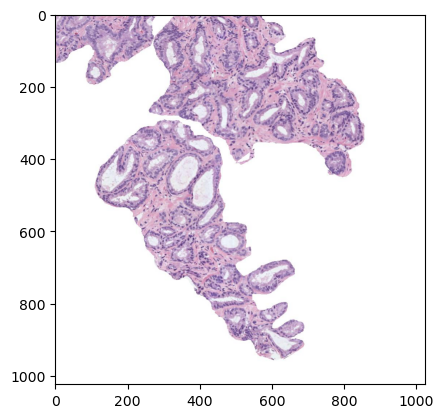

In [1]:
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB
import skimage.io as io
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np
# Utilizar la librería skimage.io para leer la imagen 'histo_x.jpg' en formato RGB
imagen = io.imread('histo_2.jpg')

# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
imagen_normalizada = img_as_float(imagen)

# Visualizar la imagen
plt.imshow(imagen_normalizada)
plt.show()


#### 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

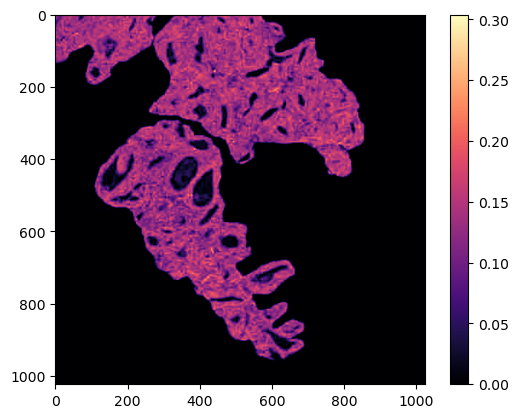

In [2]:
# Extraer la componente magenta de la imagen (que corresponde a la región tisular)
# Primero aseguramos que todos los valores sean no negativos aplicando la función np.clip
magenta = np.clip((imagen_normalizada[:, :, 0] + imagen_normalizada[:, :, 2])/2 - imagen_normalizada[:, :, 1], 0, 1)

# Visualizar la imagen del canal magenta
plt.imshow(magenta, cmap='magma')
plt.colorbar()
plt.show()


#### 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

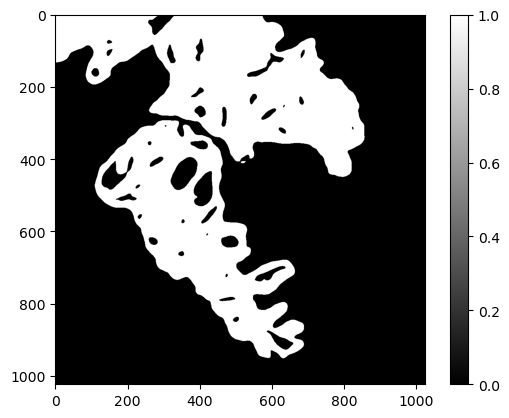

In [3]:
# Importar las funciones necesarias
from skimage import filters, img_as_ubyte
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from scipy.ndimage import gaussian_filter

# Aplicar un filtro gaussiano de tamaño 5x5
magenta_gaussiana = gaussian_filter(magenta, sigma=5)

# Escalar la imagen filtrada a un rango de 0 a 255 y convertirla a un formato de 8 bits sin signo (uint8)
magenta_gaussiana_uint8 = img_as_ubyte(magenta_gaussiana)

# Aplicar el método de Otsu para obtener el umbral
umbral = threshold_otsu(magenta_gaussiana_uint8)

# Crear la máscara binaria de la imagen en la que los píxeles con un valor superior al umbral se asignan como 1s y el resto como 0s
mascara = magenta_gaussiana_uint8 > umbral

# Visualizar la máscara resultante
plt.imshow(mascara, cmap='gray')
plt.colorbar()
plt.show()


#### 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

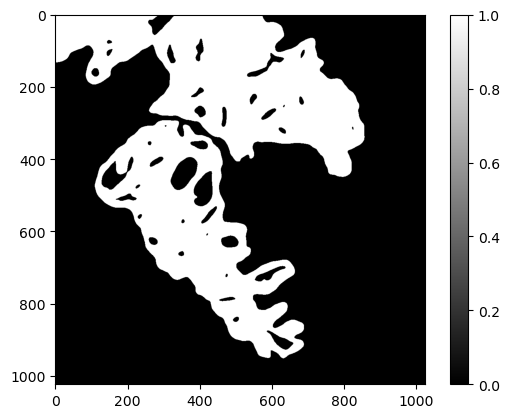

In [4]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante# Importar la función necesaria
# Importar la función necesaria
from skimage.morphology import remove_small_objects

# Eliminar objetos pequeños
mascara_limpia = remove_small_objects(mascara, min_size=300)

# Visualizar la máscara resultante
plt.imshow(mascara_limpia, cmap='gray')
plt.colorbar()
plt.show()


#### 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

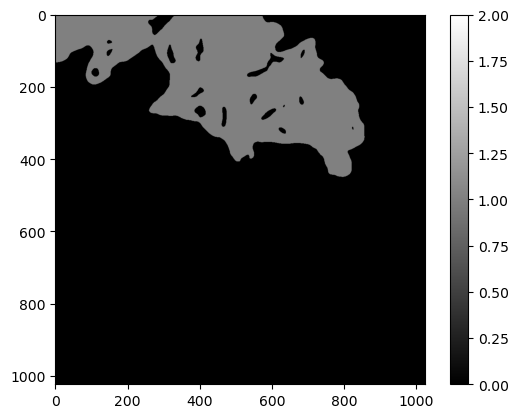

In [5]:
# Importar las funciones necesarias
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.measure import label
from scipy import ndimage as ndi

# Convertir la máscara a un formato de enteros
mascara_limpia_int = img_as_ubyte(mascara_limpia)

# Etiquetar los componentes conectados en la imagen
etiquetas = label(mascara_limpia_int)

# Cambiar el tipo de datos de las etiquetas a int32
etiquetas = etiquetas.astype(np.int32)

# Identificar los dos picos máximos locales en la imagen como semillas
seeds = peak_local_max(mascara_limpia_int, num_peaks=2, labels=etiquetas)

# Crear una matriz de semillas con las mismas dimensiones que la imagen
semillas = np.zeros(mascara_limpia_int.shape, dtype=np.int32)
semillas[seeds[:, 0], seeds[:, 1]] = np.arange(len(seeds)) + 1

# Calcular las distancias desde el fondo de la imagen
distancias = ndi.distance_transform_edt(mascara_limpia_int)

# Aplicar el algoritmo de región de crecimiento
segmentos = watershed(-distancias, semillas.astype(np.int32), mask=mascara_limpia_int)

# Visualizar la máscara resultante
plt.imshow(segmentos, cmap='gray')
plt.colorbar()
plt.show()


#### 5) Rellenar los objetos de los lúmenes

C:\Users\julis\AppData\Local\Temp\ipykernel_22720\345771081.py:2: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes


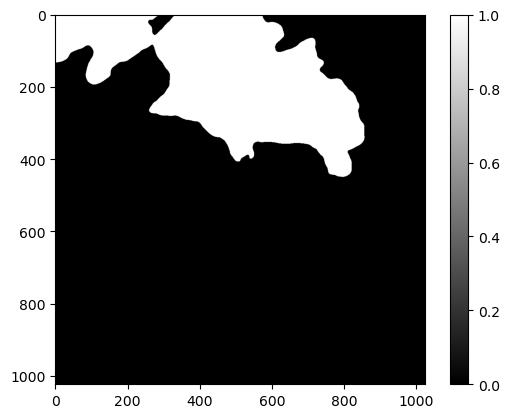

In [6]:
# Importar la función necesaria
from scipy.ndimage.morphology import binary_fill_holes

# Rellenar los lúmenes
lumenes_llenos = binary_fill_holes(segmentos)

# Visualizar la máscara resultante
plt.imshow(lumenes_llenos, cmap='gray')
plt.colorbar()
plt.show()


#### 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original

C:\Users\julis\AppData\Local\Temp\ipykernel_22720\846144179.py:5: DeprecationWarning: Please use `binary_fill_holes` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import binary_fill_holes


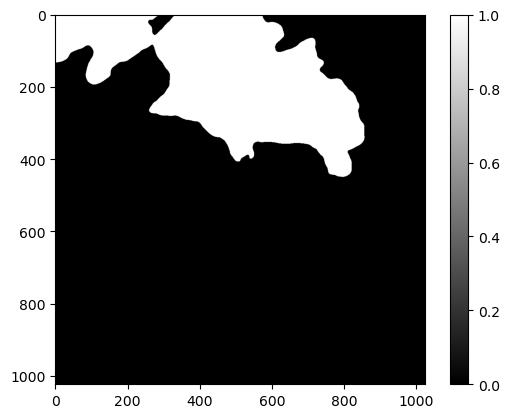

In [7]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles. 
# Visualizar la imagen superpuesta
# Importar la función necesaria
from scipy.ndimage.morphology import binary_fill_holes

# Rellenar los lúmenes
lumenes_llenos = binary_fill_holes(segmentos)

# Visualizar la máscara resultante
plt.imshow(lumenes_llenos, cmap='gray')
plt.colorbar()
plt.show()


#### 7) Identificar y cropear el lumen más grande

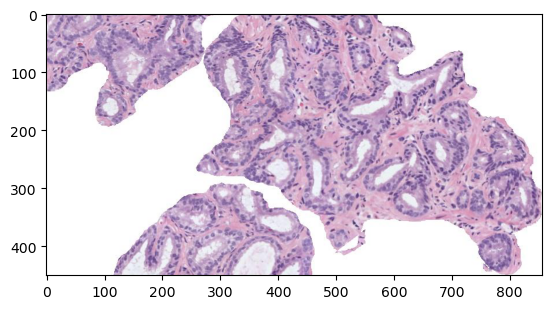

In [8]:
# Determinar cuál es el lumen de mayor área y hacer un crop del mismo sobre la imagen original RGB.
# Visualizar el lumen cropeado.
# Importar las funciones necesarias
from skimage.measure import label, regionprops

# Etiquetar los lúmenes
lumenes_etiquetados = label(lumenes_llenos)

# Calcular las propiedades de las regiones
propiedades = regionprops(lumenes_etiquetados)

# Encontrar el lumen de mayor área
lumen_mayor = max(propiedades, key=lambda x: x.area)

# Obtener las coordenadas del lumen de mayor área
minr, minc, maxr, maxc = lumen_mayor.bbox

# Recortar la imagen original
imagen_cropeada = imagen[minr:maxr, minc:maxc]

# Visualizar el lumen cropeado
plt.imshow(imagen_cropeada)
plt.show()


#### 8) Extraer 13 características geométricas que permitan caracterizar el lumen recortado 

In [9]:
# Calcular y mostrar las propiedades del lumen de mayor área
print(f"1) Área: {round(lumen_mayor.area, 4)}")
print(f"2) Área de la bounding box: {round((maxr - minr) * (maxc - minc), 4)}")
print(f"3) Área convexa: {round(lumen_mayor.convex_area, 4)}")
print(f"4) Excentricidad: {round(lumen_mayor.eccentricity, 4)}")
print(f"5) Diámetro equivalente: {round(lumen_mayor.equivalent_diameter, 4)}")
print(f"6) Extensión: {round(lumen_mayor.extent, 4)}")
print(f"7) Diámetro Feret: {round(lumen_mayor.feret_diameter_max, 4)}")
print(f"8) Longitud del eje mayor: {round(lumen_mayor.major_axis_length, 4)}")
print(f"9) Longitud del eje menor: {round(lumen_mayor.minor_axis_length, 4)}")
print(f"10) Orientación: {round(lumen_mayor.orientation, 4)}")
print(f"11) Perímetro: {round(lumen_mayor.perimeter, 4)}")
print(f"12) Solidez: {round(lumen_mayor.solidity, 4)}")
print(f"13) Compacidad: {round(lumen_mayor.perimeter**2 / (4 * np.pi * lumen_mayor.area), 4)}")


1) Área: 201254
2) Área de la bounding box: 386507
3) Área convexa: 260347
4) Excentricidad: 0.9278
5) Diámetro equivalente: 506.206
6) Extensión: 0.5207
7) Diámetro Feret: 929.1765
8) Longitud del eje mayor: 896.7671
9) Longitud del eje menor: 334.5432
10) Orientación: 1.2214
11) Perímetro: 3078.5079
12) Solidez: 0.773
13) Compacidad: 3.7474


In [1]:
from sklearn import preprocessing
import numpy as np

In [2]:
# Carga de datos.
X_train = np.array([[ 1., 2.,  2.],
                    [ 5.,  0.,  0.],
                    [ 0.,  1., -1.]])

print(X_train)

[[ 1.  2.  2.]
 [ 5.  0.  0.]
 [ 0.  1. -1.]]


In [3]:
# Limpieza de datos: normalización.
normalizer = preprocessing.MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)

In [4]:
# Salida de resultados.
print(X_train_norm)

[[0.2        1.         1.        ]
 [1.         0.         0.33333333]
 [0.         0.5        0.        ]]


In [5]:
# Ejemplo para ver que los resultados son iguales si aplicamos los métodos "fit" y "transform" por separado
X_train_2 = np.copy(X_train)

# Crea un objeto "fitted_normalizer" llamando al método "fit"
f = normalizer.fit(X_train)

# Aplica el objeto sobre los datos "X_train_2" para obtener "X_train_norm_2"
X_train_norm_2 = f.transform(X_train_2)

# Comprueba si "X_train_norm" y "X_train_norm_2" son iguales
print(np.array_equiv(X_train_norm, X_train_norm_2))

True


In [6]:
# Normalizar un nuevo conjunto de datos de test (SOLO HAY QUE APLICAR EL MÉTODO "transform", NO EL "fit")
X_test = np.array([[ 1., -3.,  2.],
                    [ 3.,  0.,  0.],
                    [ 0.,  4., -1.]])

# Normalizar los datos de "X_test"
X_test_norm = f.transform(X_test)
print(X_test_norm)

[[ 0.2        -1.5         1.        ]
 [ 0.6         0.          0.33333333]
 [ 0.          2.          0.        ]]


In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings(action='ignore',module='sklearn')

In [3]:
# Cargar y explorar los datos
datos = datasets.load_boston()
print(np.shape(datos.data))

(506, 13)


In [4]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.data
y = datos.target

In [5]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Estandarización de los datos de entrenamiento y test
stdr = preprocessing.StandardScaler()
X_train = stdr.fit_transform(X_train)
X_test = stdr.transform(X_test)

In [7]:
# Métricas de evaluación.
metricas = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
    'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [8]:
# Definimos un algoritmo SVM de regresión
alg = SVR(C=100, gamma='auto', kernel='rbf')

In [9]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!! 
results = cross_validate(alg, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)

In [10]:
# Presentación de los resultados de la evaluación.
pprint(results)

{'fit_time': array([0.07000685, 0.02109623, 0.02252388, 0.02211189, 0.022578  ]),
 'score_time': array([0.00446677, 0.00351715, 0.00299859, 0.00322008, 0.00364494]),
 'test_MAE': array([-2.53321657, -1.97577853, -2.749176  , -2.49085082, -1.87265003]),
 'test_MAPE': array([-13.62035794,  -9.52217681, -11.39432082, -11.49564794,
       -11.1700813 ]),
 'test_MSE': array([-15.39579362,  -7.10759271, -30.3102962 , -12.62322446,
        -6.4009247 ]),
 'test_RMSE': array([-3.9237474 , -2.66600689, -5.50547874, -3.55291774, -2.53000488])}


In [11]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model = SVR(C=100, gamma='auto', kernel='rbf')
model = model.fit(X_train, y_train)

In [12]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Test results (MAE): ', np.round(mae,4))
print('Test results (r2): ', np.round(r2,4))

Test results (MAE):  2.0675
Test results (r2):  0.8379


In [13]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', np.round(y_pred[:10], 1))
print('Valores reales: ', y_test[:10])

Predicciones:    [26.2 32.1 14.7 22.1 16.1 21.2 19.2 15.8 21.4 19.9]
Valores reales:  [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]


In [14]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

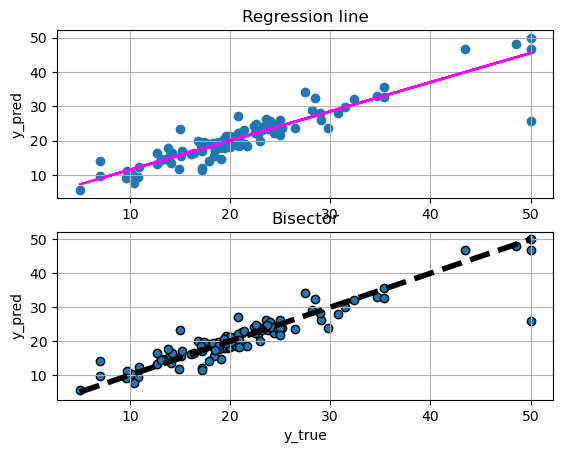

In [15]:
report_regression_graphics(y_test, y_pred)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pprint import pprint
from sklearn.svm import SVC
import pandas as pd

In [2]:
# Carga de datos.
datos = datasets.load_iris()
# pprint(datos)
print(np.shape(datos.data))

(150, 4)


In [3]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.data
y = datos.target

In [4]:
# Carga de datos.
csv = pd.read_csv('Dataset_spine_2C.csv', sep=',')
print(csv.head())
# Convertir dataframe en numpy array
data = np.array(csv)
X = data[:,:-1]
y = data[:,-1]

ocur, frec = np.unique(y, return_counts=True)
print(ocur, frec)

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset_spine_2C.csv'

In [5]:
# Partición EXTERNA. Test: hold-out split 80-20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train dimensions: ', np.shape(X_train))
print('Test dimensions:  ', np.shape(X_test))

Train dimensions:  (120, 4)
Test dimensions:   (30, 4)


In [ ]:
# Estandarización de los datos de entrenamiento y test
standardizer = preprocessing.StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

In [ ]:
# Definimos el algoritmo
# C=0.1, gamma='auto' y kernel gausiano
alg = SVC(C=1, gamma='scale', kernel='rbf')

In [ ]:
# Validación y obtención de las predicciones del modelo.
# en "cv=KFold(n_splits=5)" se hace el cross-validation INTERNO!!
# el comando "cross_val_predict" nos permite extraer directamente las predicciones de las 5 bolsas de validación
y_pred = cross_val_predict(alg, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42))
print(y_pred)

In [ ]:
# Presentación de los resultados de la evaluación.
print("Exactitud: %.3f" % (metrics.accuracy_score(y_train, y_pred))) # accuracy
print("Precisión: %.3f" % (metrics.precision_score(y_train, y_pred, average="macro"))) # precision
print("Sensibilidad: %.3f" % (metrics.recall_score(y_train, y_pred, average="macro"))) # sensibilidad
print("F1-score: %.3f" % (metrics.f1_score(y_train, y_pred, average="macro"))) # F-score


In [ ]:
# Extraemos la matriz de confusión
print("Matriz de confusión:\n", metrics.confusion_matrix(y_train, y_pred))

In [ ]:
print("Tabla de métricas:\n", metrics.classification_report(y_train, y_pred))

In [ ]:
# Una vez hemos optimizado los hiperparámetros con el conjunto de validación, utilizamos todos los datos de 
# "train" y "validation" para entrenar un modelo definitivo con esos hiperparámetros ajustados
model = SVC(C=1, gamma='scale', kernel='rbf') # Definimos el modelo con los hiperparámetros óptimos
model = model.fit(X_train, y_train) # Entrenamos el modelo con todos los datos de "train" + "val"

# y finalmente evaluamos el test con el método "score()"
test_results = model.score(X_test, y_test) # Evaluamos la exactitud del test
print('Exactitud en test: ', np.round(test_results*100,4), '%')

In [ ]:
# obtenemos las predicciones del test para extraer el resto de métricas de interés
y_pred_test = model.predict(X_test) # Extraer predicciones
print(metrics.classification_report(y_test, y_pred_test)) # Aplicar el método de classification_report()
print(metrics.confusion_matrix(y_test, y_pred_test)) # Extraer la matriz de confusión

In [1]:
import numpy as np
from math import sqrt
from pprint import pprint
from sklearn import datasets, linear_model, metrics
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Carga de datos.
#datos = datasets.load_boston()
datos = datasets.fetch_california_housing()
X = datos.data
y = datos.target
print('Dimensiones de X: ', np.shape(X))
# print(y)
# pprint(datos)

Dimensiones de X:  (20640, 8)


In [3]:
# # Métricas de evaluación.
metricas = {
  'MAE':  'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False),
  'R2':   'r2',}

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(16512, 8)
(4128, 8)


In [5]:
# 2) Extracción de características
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [6]:
# 4) Selección de atributos

In [7]:
# 5) Construcción del algoritmo de aprendizaje.
reg = linear_model.LinearRegression(fit_intercept=True)

In [9]:
# 5.1) Validación cruzada interna

# Extraer directamente resultados del error para cada bolsa, en lugar de las predicciones
cross_val_results = cross_validate(reg, X_stdr, y_training, 
                                    cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
# print("cross_val_R2:   %0.4f +/- %0.4f" % (-cross_val_results.mean(), cross_val_results.std()))
pprint(cross_val_results)

{'fit_time': array([0.00499797, 0.00399876, 0.00299072, 0.00299144, 0.00399995]),
 'score_time': array([0.00100112, 0.00099945, 0.00100017, 0.00100851, 0.        ]),
 'test_MAE': array([-0.54071407, -0.52878981, -0.51274193, -0.53512422, -0.52793364]),
 'test_MAPE': array([-31.74769388, -31.65516613, -30.97054077, -32.61432353,
       -30.685065  ]),
 'test_R2': array([0.60970239, 0.60411343, 0.6354319 , 0.60076148, 0.60727452]),
 'test_RMSE': array([-0.73389779, -0.72516701, -0.69726867, -0.73337185, -0.71284225])}


In [10]:
# 5.2) Entrenamiento con todos los datos para obtener los coeficientes del modelo.
model = reg.fit(X_stdr, y_training)

# Obtención de los coeficientes del modelo.
w = model.coef_
print('Model coeficients: \n', w)

# Obtención del término independiente del modelo.
w_0 = model.intercept_
print('\nTérmino independiente: ', w_0)

Model coeficients: 
 [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]

Término independiente:  2.071946937378619


In [ ]:
# ---- PREDICCIÓN ---- #

In [11]:
# 6) Extracción de las características de test 
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [12]:
# 8) Selección de los atributos de test

In [13]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

In [14]:
# 10) Cálculo de las métricas de evaluación.
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

MAE:  0.5332
MSE: 0.5559
RMSE: 0.7456
R2:   0.5758


In [15]:
# Get regression graphics
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

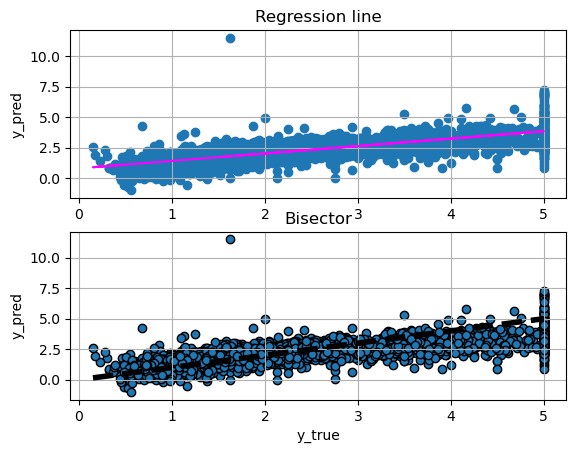

In [16]:
# Extraemos los resultados cualitativos del problema de regresión
report_regression_graphics(y_testing, y_pred_test)

In [ ]:
# Información sobre los algoritmos Ridge, Lasso y Elasticnet
# https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

In [24]:
import numpy as np
from math import sqrt
from sklearn import datasets, linear_model, metrics
from pprint import pprint
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split, KFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_regression
import matplotlib.pyplot as plt
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de datos.
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target
print(np.shape(X))

(506, 13)


In [3]:
# Métricas de evaluación.
metricas = {'MAE':  'neg_mean_absolute_error',
            'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(metrics.mean_squared_error(y, y_pred)),
                      greater_is_better=False),
            'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

### 1) PARTICIÓN EXTERNA DE DATOS

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))
print(np.shape(X_testing))

(404, 13)
(102, 13)


### 2-5) ENTRENAMIENTO

In [ ]:
# 2) Extracción de características

In [5]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)

In [ ]:
# 4) Selección de atributos

In [6]:
# 5) Construcción del algoritmo de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k, weights='distance', metric='euclidean')

In [7]:
# 5.1) Validación cruzada interna
# Extraer MEAN +- STD del coeficiente de determinación (R2) para un cross validation de 5 bolsas aleatorias y semilla en 42
r2_cv_results = cross_val_score(reg, X_stdr, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42))
print("cross_val_R2:   %0.4f +/- %0.4f" % (r2_cv_results.mean(), r2_cv_results.std()))

cross_val_R2:   0.7216 +/- 0.1121


In [8]:
# Extraer métricas MAE, MSE, RMSE y MAPE en un cross validation para 5 bolsas aleatorias y semilla en 42
metrics_cv_results = cross_validate(reg, X_stdr, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42), scoring=metricas)
pprint(metrics_cv_results)

{'fit_time': array([0.00099754, 0.0009973 , 0.0007751 , 0.        , 0.        ]),
 'score_time': array([0.0009973 , 0.00102639, 0.        , 0.        , 0.0048418 ]),
 'test_MAE': array([-3.42033374, -3.22759563, -3.38851836, -3.10542235, -2.31204307]),
 'test_MAPE': array([-16.07369641, -13.76638608, -14.16884202, -14.24046968,
       -11.71729274]),
 'test_RMSE': array([-5.36563305, -4.81169947, -6.09877868, -4.36938374, -3.19815593])}


In [9]:
# Extraer las predicciones del cross validation de 5 bolsas aleatorias y semilla en 42
y_pred = cross_val_predict(reg, X_stdr, y_training, cv = KFold(n_splits=5, shuffle=True, random_state=42))

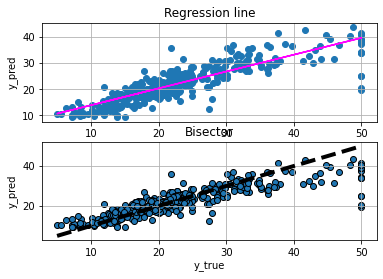

In [12]:
# Crear una función que dadas las variables "y" e "y_pred" se visualice la bisectriz y la recta de regresión
def report_regression_graphics(y_true, y_pred):
    fig, ax = plt.subplots(2,1)

    # Plot linear fit
    ax[0].scatter(y_true, y_pred)
    ax[0].set_ylabel('y_pred')
    ax[0].set_title('Regression line')
    ax[0].grid()
    # overlay the regression line
    z = np.polyfit(np.float64(y_true), y_pred, 1)
    p = np.poly1d(z)
    ax[0].plot(y_true, p(y_true), color='magenta')

    # Plot bisectriz
    ax[1].scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax[1].set_xlabel('y_true')
    ax[1].set_ylabel('y_pred')
    ax[1].set_title('Bisector')
    ax[1].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax[1].grid()

# Visualiza la bisetriz y recta de regresión
report_regression_graphics(y_training, y_pred)

In [13]:
# 5.2) Entrenamiento del modelo definitivo
model = reg.fit(X_stdr, y_training)

### 6-10) PREDICCIÓN

In [ ]:
# 6) Extracción de las características de test 

In [14]:
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [ ]:
# 8) Selección de los atributos de test

In [15]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)

MAE:  2.6974
MSE: 22.6257
RMSE: 4.7566
R2:   0.6915


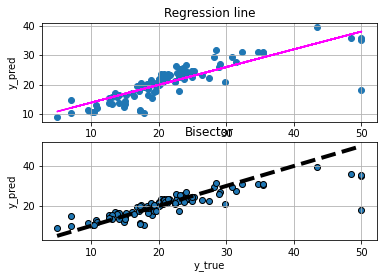

In [16]:
### 10) Evaluación del modelo sobre el conjunto de test
MAE = metrics.mean_absolute_error(y_testing, y_pred_test)
MSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=True)
RMSE = metrics.mean_squared_error(y_testing, y_pred_test, squared=False)
R2 = metrics.r2_score(y_testing, y_pred_test)

print('MAE:  %.4f' % MAE)
print('MSE: %.4f' % MSE)
print('RMSE: %.4f' % RMSE)
print('R2:   %.4f' % R2)

# Visualización de resultados
report_regression_graphics(y_testing, y_pred_test)

### ACTIVIDAD EXTRA

#### Entrenar el mejor modelo posible con el algoritmo KNN y comparar el resultado con el modelo OLS en test

In [17]:
from sklearn.model_selection import GridSearchCV
# Definir parámetros de búsqueda
parameters = {'n_neighbors':range(10), 
              'weights':('uniform', 'distance'), 
              'metric': ('minkowski', 'euclidean', 'manhattan'), 
              'algorithm': ('ball_tree', 'kd_tree', 'auto')}

# Aplicar el algoritmo de búsqueda
reg = KNeighborsRegressor()
model = GridSearchCV(reg, parameters, scoring='r2')

# Entrenar el modelo
model.fit(X_stdr, y_training)

# Extraer los mejores parámetros
model.best_params_

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 2,
 'weights': 'distance'}

In [18]:
# OPTIMIZATION OF HYPERPARAMETERS
parameters = {'OLS': {'normalize': (True, False)},
              'Lasso': {'alpha': (0.1, 1, 5, 10, 50, 100)},
              'Ridge': {'alpha': (0.1, 1, 5, 10, 50, 100)},
              'KNN': {'n_neighbors':range(10),
                      'weights':('uniform', 'distance'),
                      'metric': ('minkowski', 'euclidean', 'manhattan'),
                      'algorithm': ('ball_tree', 'kd_tree', 'auto')}}

In [20]:
# ALGORITHMS
algs = {'OLS': linear_model.LinearRegression(),
        'Lasso': linear_model.Lasso(random_state=42),
        'Ridge': linear_model.Ridge(random_state=42),
        'KNN': KNeighborsRegressor()}


In [26]:
model = {}
for name, _ in algs.items():
    print(colored('Algorithm: ' + name, 'red'))
    score = make_scorer(r2_score)
    model_cv = GridSearchCV(algs[name], parameters[name], scoring=score, cv=5, return_train_score=True)
    model[name] = model_cv.fit(X_stdr, y_training)
    cv_res = model[name].cv_results_
    print('Best parameters: ', model[name].best_params_)
    best_iter = model[name].best_index_
    print('R2 score: %0.4f +/- %0.4f' % (cv_res['mean_test_score'][best_iter], cv_res['std_test_score'][best_iter]))
    print('------------')

Algorithm: OLS
Best parameters:  {'normalize': True}
R2 score: 0.7244 +/- 0.0635
------------
Algorithm: Lasso
Best parameters:  {'alpha': 0.1}
R2 score: 0.7180 +/- 0.0640
------------
Algorithm: Ridge
Best parameters:  {'alpha': 5}
R2 score: 0.7245 +/- 0.0633
------------
Algorithm: KNN
Best parameters:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
R2 score: 0.8223 +/- 0.0397
------------


In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from evaluacion_funciones import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carga de datos.
dataset = datasets.fetch_california_housing()
X = dataset.data
y = dataset.target
print(np.shape(X))

(20640, 8)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [4]:
# Construcción de los algoritmos de aprendizaje.
k = 10
base = 'KNN' + str(k)
algoritmos = {}

In [6]:
# Algoritmo 1: KNN
algoritmos[base] = KNeighborsRegressor(n_neighbors = k)

{'KNN10': KNeighborsRegressor(n_neighbors=10)}


In [8]:
# Algoritmo 2: Estandarización + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('reg', algoritmos['KNN'+str(k)])]
algoritmos['Est+'+base] = Pipeline(pasos)

In [9]:
# Algoritmo 3: Estandarización + Selección atributos + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression, percentile=10)),
         ('reg', algoritmos['KNN'+str(k)])]
algoritmos['Est+SelAtr+'+base] = Pipeline(pasos)

In [13]:
# Algoritmo 4: Estandarización + Selecc. atributos + KNN(p=1)
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression,
           percentile=10)),
         ('reg', KNeighborsRegressor(n_neighbors = k, p=1))]
algoritmos['Est+SelAtr+'+base+'(p=1)'] = Pipeline(pasos)
print(algoritmos)

{'KNN10': KNeighborsRegressor(n_neighbors=10), 'Est+KNN10': Pipeline(steps=[('estandarizacion', StandardScaler()),
                ('reg', KNeighborsRegressor(n_neighbors=10))]), 'Est+SelAtr+KNN10': Pipeline(steps=[('estandarizacion', StandardScaler()),
                ('selatr',
                 SelectPercentile(score_func=<function f_regression at 0x000001C4A90A4F70>)),
                ('reg', KNeighborsRegressor(n_neighbors=10))]), 'Est+SelAtr+KNN10(p=1)': Pipeline(steps=[('estandarizacion', StandardScaler()),
                ('selatr',
                 SelectPercentile(score_func=<function f_regression at 0x000001C4A90A4F70>)),
                ('reg', KNeighborsRegressor(n_neighbors=10, p=1))])}


In [11]:
# Validación y obtención de las predicciones del modelo.
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X, y, cv=KFold(n_splits=10, shuffle=True,random_state=42))

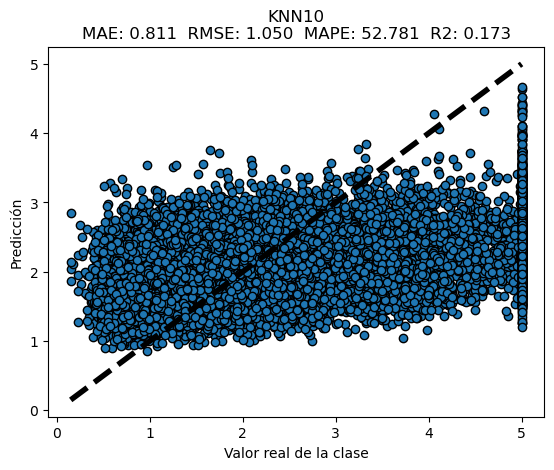

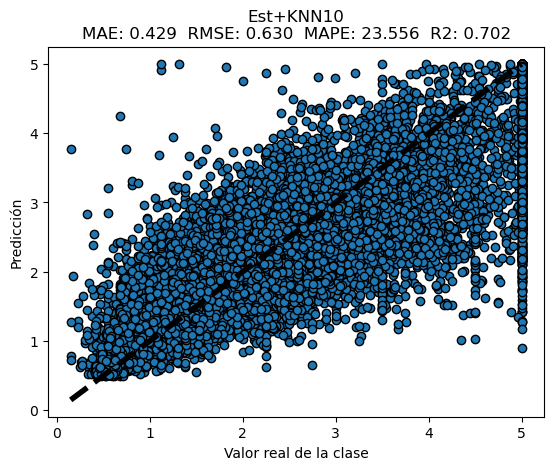

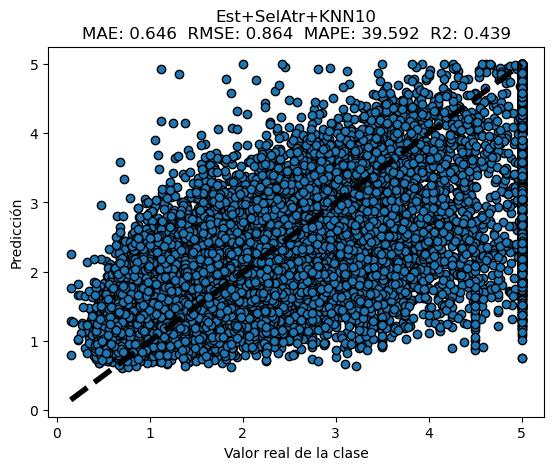

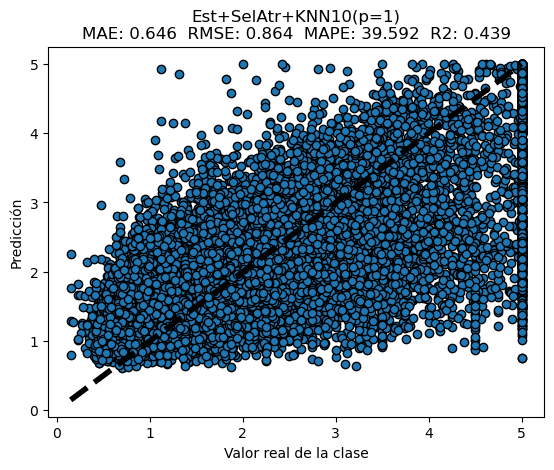

In [12]:
# Evaluación y presentación de resultados.
for nombre, alg in algoritmos.items():
    results = evaluacion(y, y_pred[nombre], metricas)
    grafica_real_vs_pred(y, y_pred[nombre], results, nombre)

In [1]:
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn import preprocessing
from evaluacion_funciones import *

In [2]:
# Carga de datos.
datos = load_iris()
X = datos.data[:,2:] # Utilizamos solo 2 atributos.
y = datos.target
print(np.shape(X))

(150, 2)


In [3]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

In [4]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(120, 2)


In [5]:
# ------------- TRAINING ---------------- #

In [6]:
# 2) Extracción de características

In [7]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)
# print(X_stdr)

In [8]:
# 4) Selección de atributos

In [9]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'LOGR': LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42, multi_class='ovr')}

In [10]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_stdr, y_training, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    results = evaluacion(y_training, y_pred[nombre], metricas)
    print(metrics.confusion_matrix(y_training, y_pred[nombre]))
    print(results)
    
#     results = cross_val_score(alg, X_stdr, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))
#     print("Accuracy:   %0.4f +/- %0.4f" % (results.mean(), results.std()))

[[40  0  0]
 [ 1 37  3]
 [ 0  5 34]]
{'ACC': 0.925, 'PREC': 0.925, 'RECALL': 0.925, 'F1': 0.925}


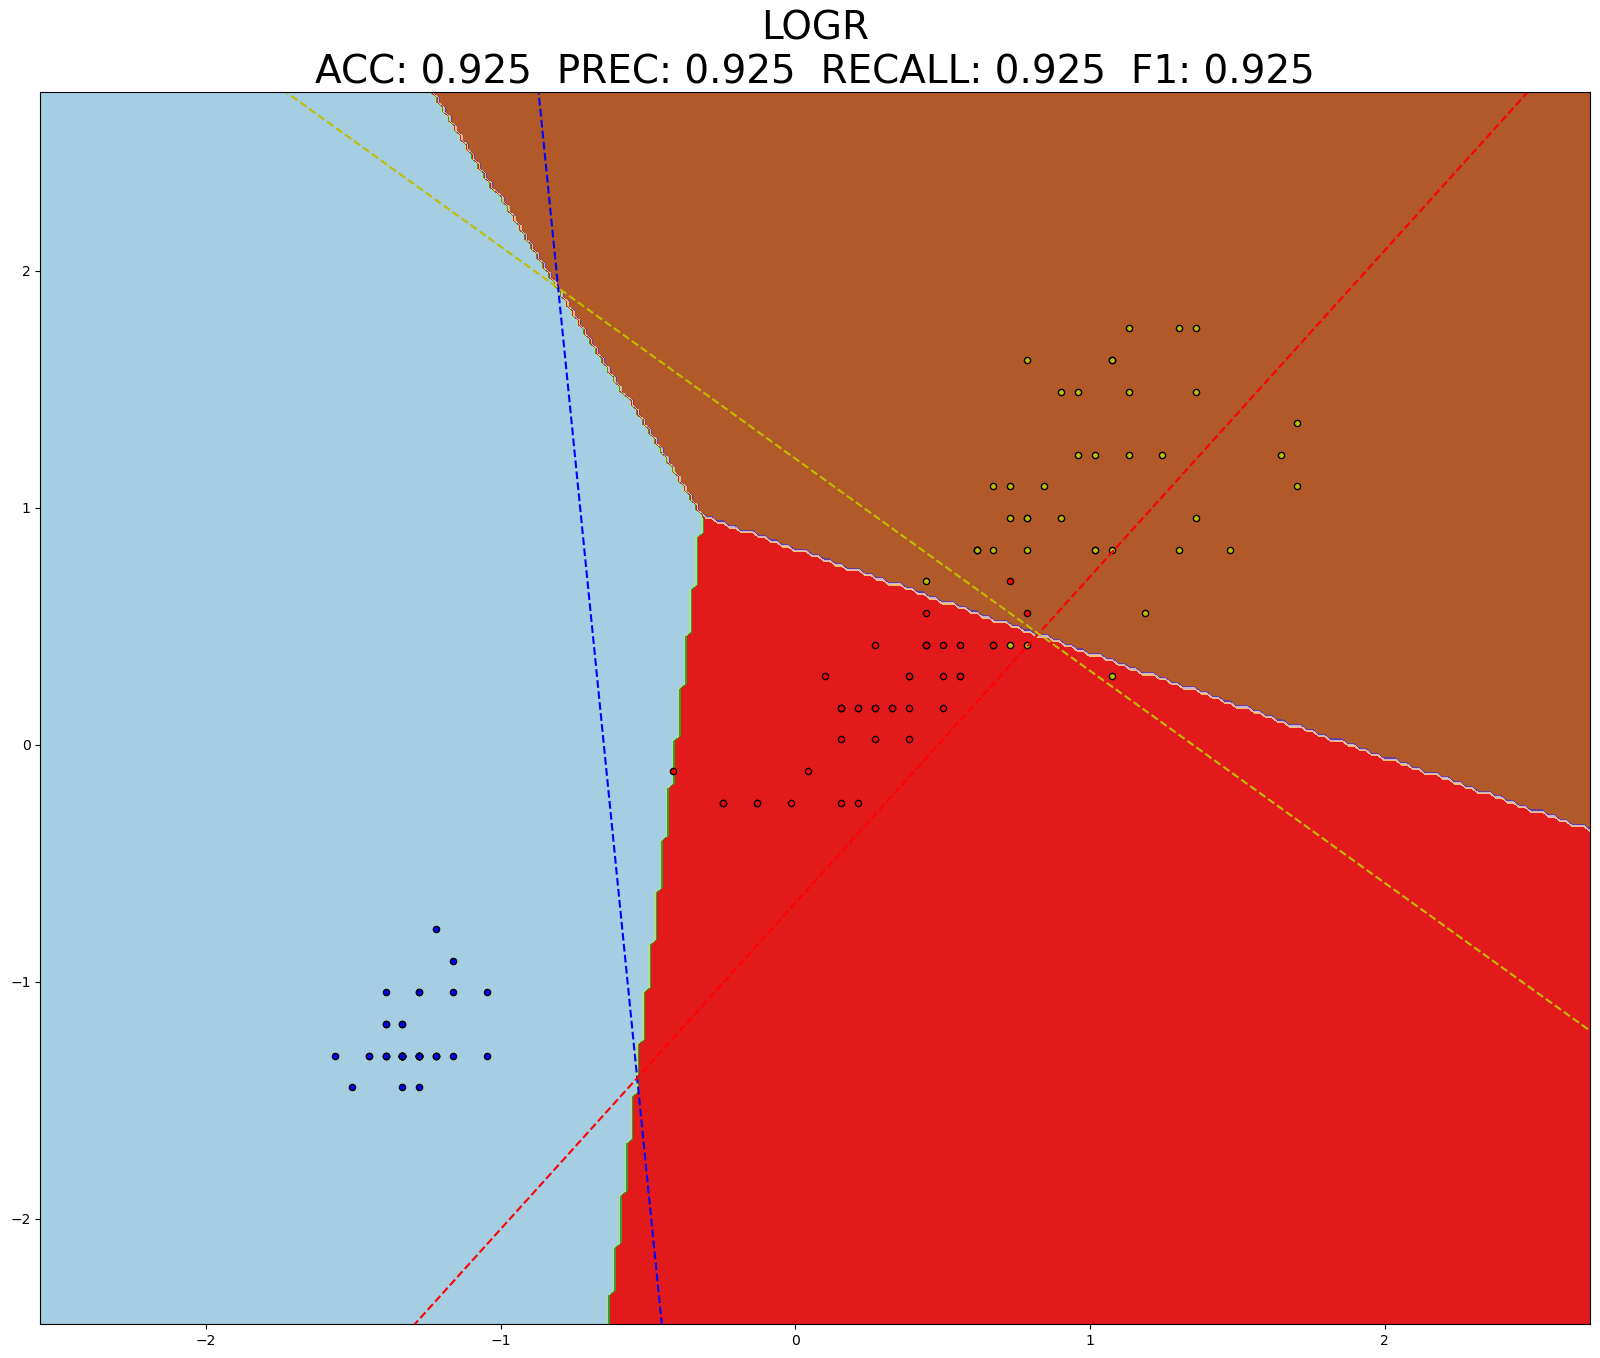

In [11]:
# 5.2) Entrenamiento del modelo definitivo
model = algoritmos['LOGR'].fit(X_stdr, y_training)

# Visualización de las fronteras de decisión
mapa_modelo_clasif_2d(X_stdr, y_training, model, results, nombre)

In [12]:
# ------------- PREDICTION ---------------- #

In [13]:
# 6) Extracción de las características de test

In [14]:
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [15]:
# 8) Selección de los atributos de test 

In [16]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [17]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)
print(metrics.confusion_matrix(y_testing, y_pred_test))

{'ACC': 1.0, 'PREC': 1.0, 'RECALL': 1.0, 'F1': 1.0}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


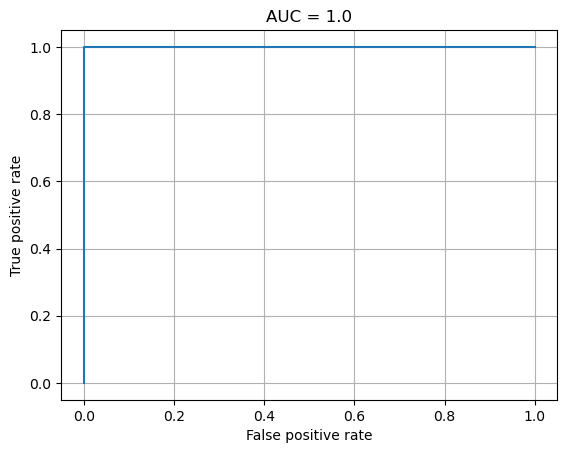

In [18]:
# Ploteamos la curva ROC
y_proba_test = model.predict_proba(X_test_stdr) # "predict_proba" para extraer probabilidades vez de predicciones

y_test_bin = preprocessing.label_binarize(y_testing, classes=[0,1,2]) # Usar "label_binarize" en el caso de problemas multiclase

auc = metrics.roc_auc_score(y_testing, y_proba_test, multi_class='ovr') # Area Under the ROC curve (AUC)

fpr, tpr, th = metrics.roc_curve(y_test_bin[:,1], y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

In [1]:
from sklearn import tree
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from evaluacion_funciones import *

In [2]:
seed=42

In [3]:
# Cargamos el conjunto de datos
datos_iris = datasets.load_iris()
datos_wine = datasets.load_wine()
datos_breast = datasets.load_breast_cancer()

X = {
    'IRIS': datos_iris.data,
    'WINE': datos_wine.data,
    'BREAST': datos_breast.data
}

y = {
    'IRIS': datos_iris.target,
    'WINE': datos_wine.target,
    'BREAST': datos_breast.target
}

In [4]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')
}

In [5]:
# 1) Partición externa
# 2) Extracción de características (en caso de trabajar con imágenes)

# 3) Estandarizacion de los datos
standardizer = preprocessing.StandardScaler()
for nombre, exp in X.items():
    X[nombre] = standardizer.fit_transform(X[nombre])

# 4) Selección de atributos

In [6]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'DT': tree.DecisionTreeClassifier(criterion='gini', random_state=seed)}

In [7]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, exp in X.items():
    y_pred[nombre] = cross_val_predict(algoritmos['DT'], X[nombre], y[nombre], 
                                       cv=KFold(n_splits=5, shuffle=True, random_state=seed))

In [8]:
# Mostramos el resultado de varias métricas
results={}
for nombre, exp in X.items():
    results[nombre] = evaluacion(y[nombre], y_pred[nombre], metricas)
    print("Matriz de confusión (%s):\n%s" % (nombre, metrics.confusion_matrix(y[nombre], y_pred[nombre])))
    print("Tabla de métricas (%s):\n%s" % (nombre, metrics.classification_report(y[nombre], y_pred[nombre], digits=3)))

Matriz de confusión (IRIS):
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]
Tabla de métricas (IRIS):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      0.922     0.940     0.931        50
           2      0.939     0.920     0.929        50

    accuracy                          0.953       150
   macro avg      0.953     0.953     0.953       150
weighted avg      0.953     0.953     0.953       150

Matriz de confusión (WINE):
[[53  6  0]
 [ 5 61  5]
 [ 1  5 42]]
Tabla de métricas (WINE):
              precision    recall  f1-score   support

           0      0.898     0.898     0.898        59
           1      0.847     0.859     0.853        71
           2      0.894     0.875     0.884        48

    accuracy                          0.876       178
   macro avg      0.880     0.877     0.879       178
weighted avg      0.877     0.876     0.876       178

Matriz de confusión (BREAST):
[[194  18]
 [ 20 337]]
Tab

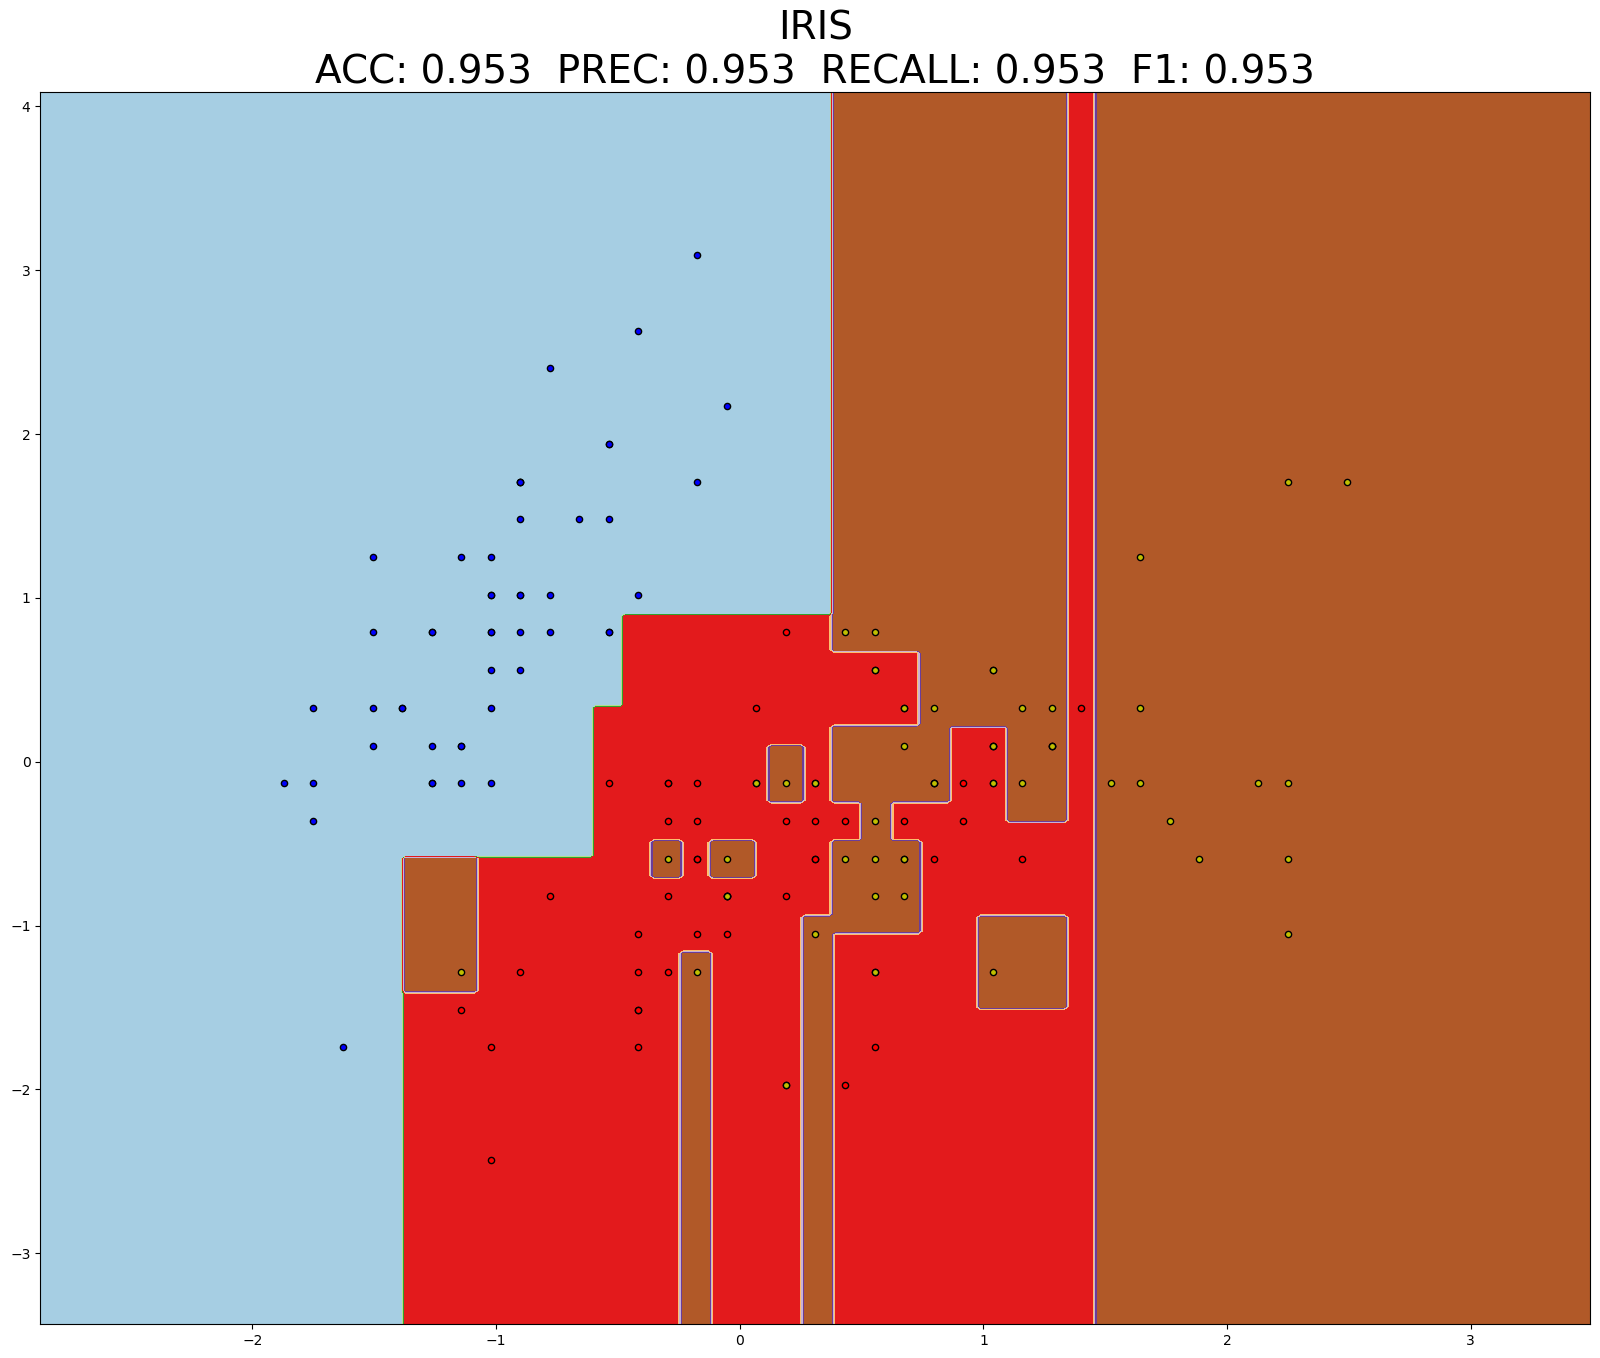

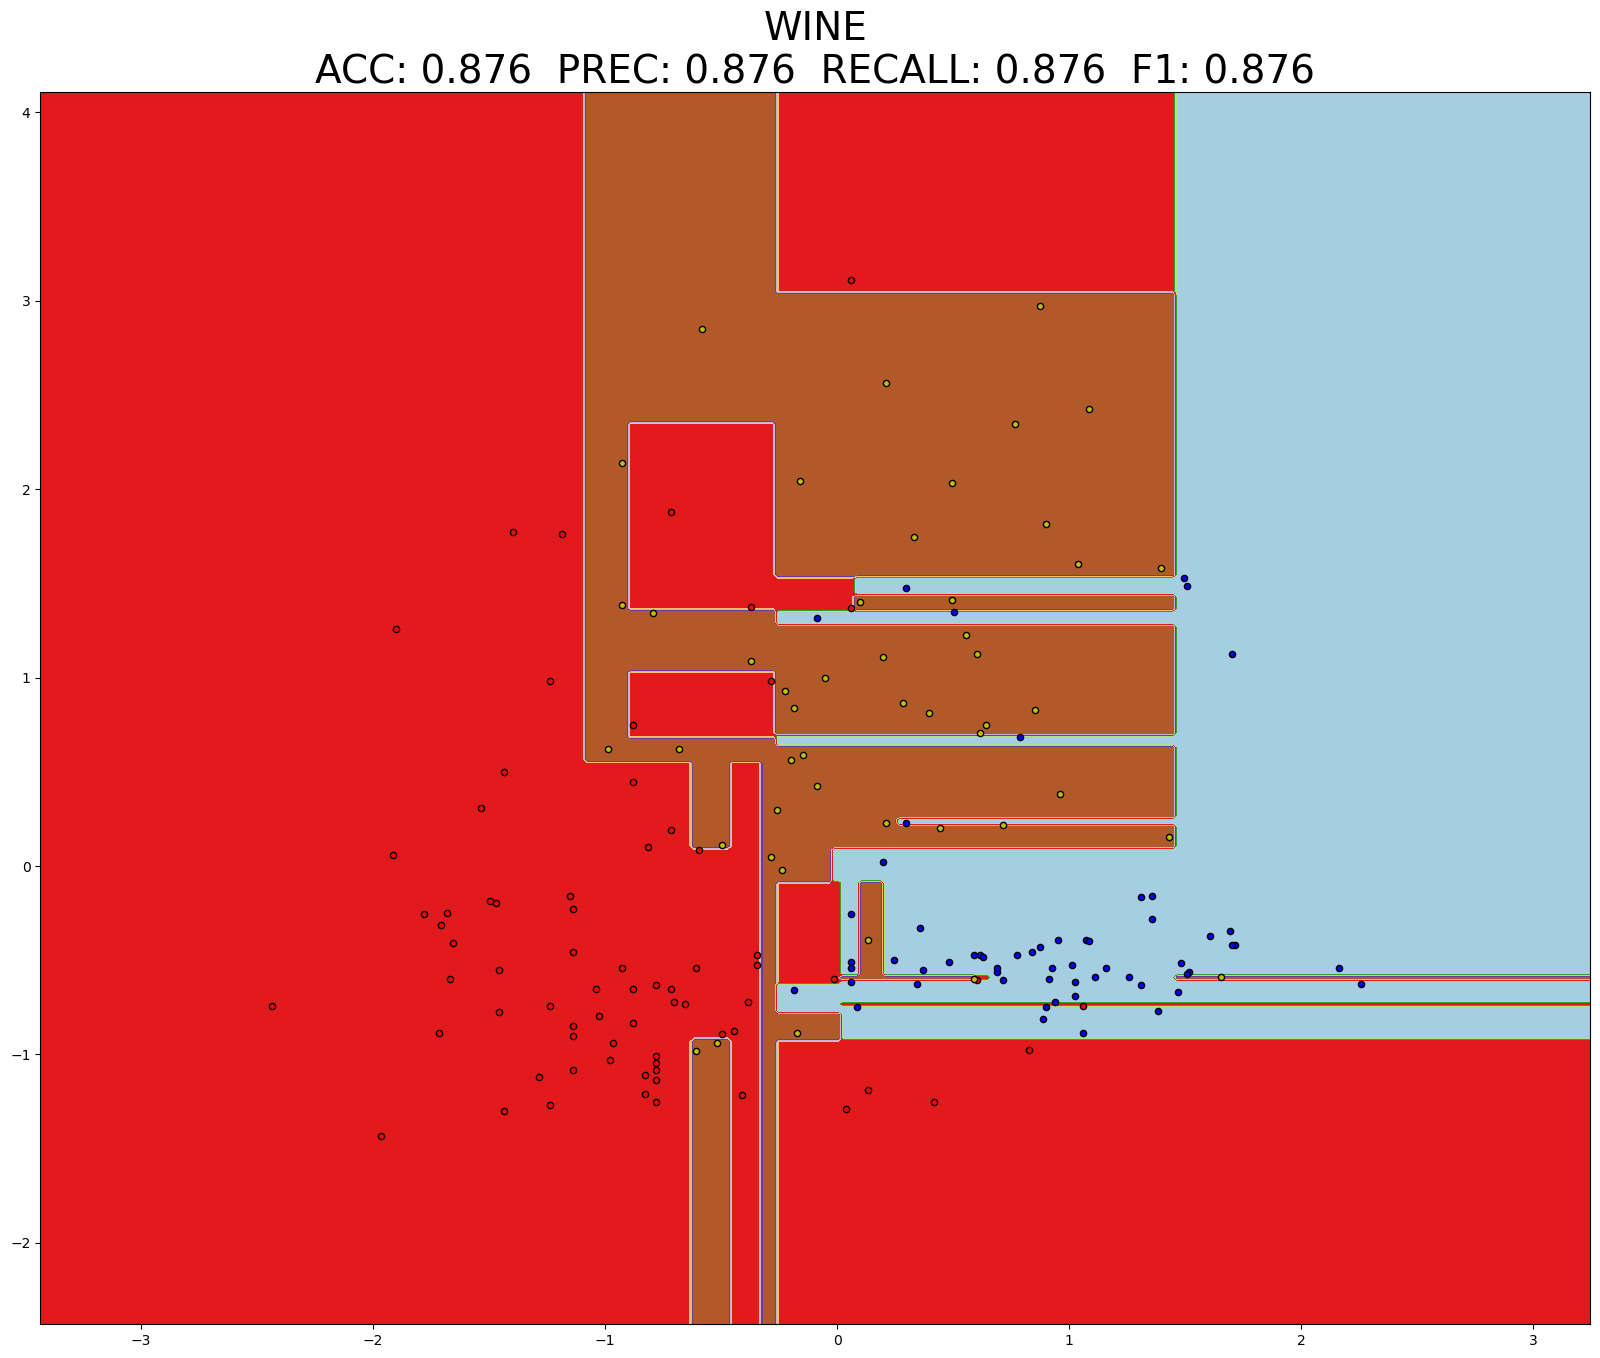

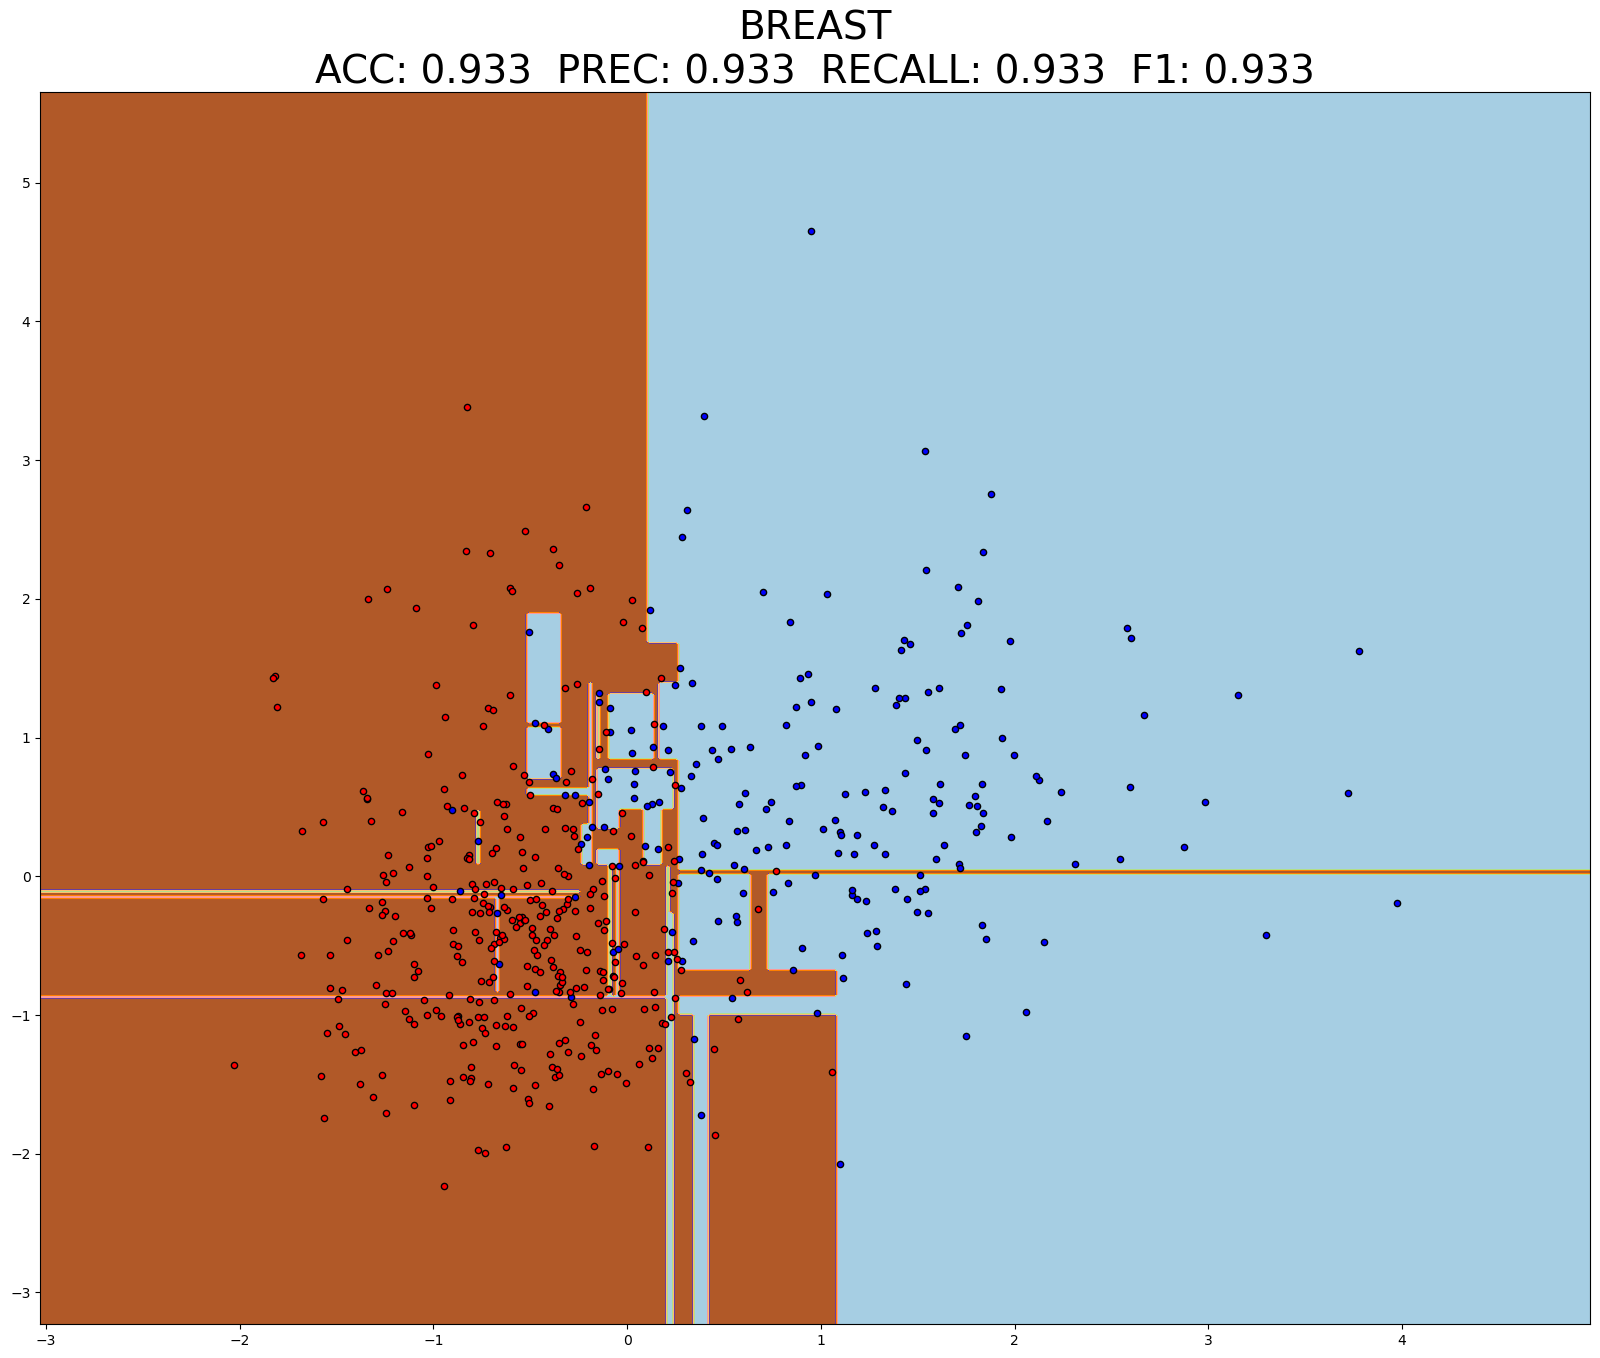

In [9]:
# 5.2) Entrenamiento del modelo definitivo (usamos 2 atributos para poder obtener gráficos en 2D)
for nombre, exp in X.items():
    modelo_definitivo = algoritmos['DT'].fit(X[nombre][:,:2], y[nombre])
    mapa_modelo_clasif_2d(X[nombre][:,:2], y[nombre], modelo_definitivo, results[nombre], nombre)

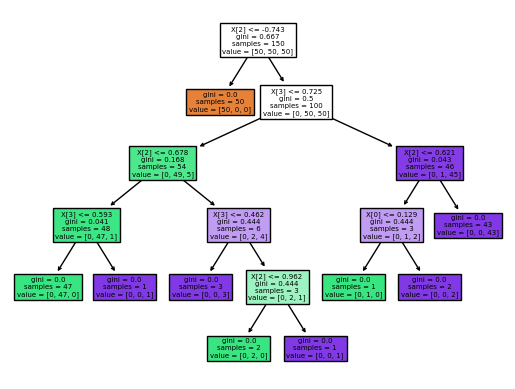

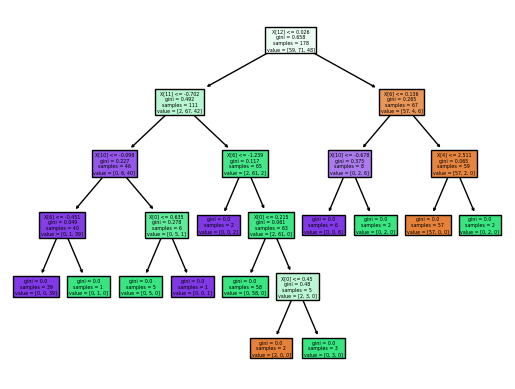

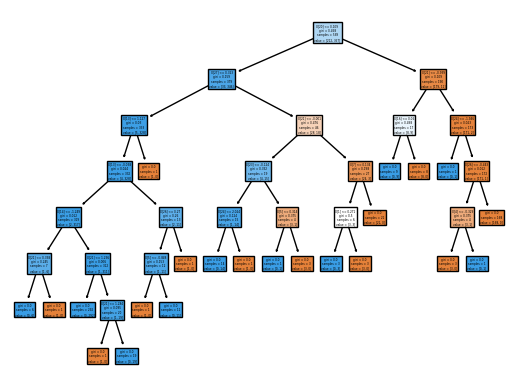

In [11]:
# 5.3) Ploteamos el árbol con todos los datos para visualización árbol.
for nombre, exp in X.items():
    modelo_completo = algoritmos['DT'].fit(X[nombre], y[nombre])
    plt.figure()
    tree.plot_tree(modelo_completo,filled=True)  
    plt.savefig('tree_' + nombre + '.pdf',format='pdf',bbox_inches = "tight")

In [ ]:
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn import preprocessing, svm
from evaluacion_funciones import *

In [ ]:
# Carga de datos.
datos = load_iris()
X = datos.data
y = datos.target
print(np.shape(X))

In [ ]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred,
              average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred,
              average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

In [ ]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

In [ ]:
# ------------- TRAINING ---------------- #

In [ ]:
# 2) Extracción de características

In [ ]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
stdr_trained = standardizer.fit(X_training)
X_stdr = stdr_trained.transform(X_training)
# print(X_stdr)

In [ ]:
# 4) Selección de atributos

In [ ]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'SVM': svm.SVC(C=10, random_state=42, probability=True)}

In [ ]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_stdr, y_training, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    results = evaluacion(y_training, y_pred[nombre], metricas)
    print(metrics.confusion_matrix(y_training, y_pred[nombre]))

#     results = cross_val_score(alg, X_stdr, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))
#     print("Accuracy:   %0.4f +/- %0.4f" % (results.mean(), results.std()))

In [ ]:
# 5.2) Entrenamiento del modelo definitivo
model = algoritmos['SVM'].fit(X_stdr, y_training)

In [ ]:
# ------------- PREDICTION ---------------- #

In [ ]:
# 6) Extracción de las características de test 

In [ ]:
# 7) Estandarización de las característiacs de test
X_test_stdr = stdr_trained.transform(X_testing)

In [ ]:
# 8) Selección de los atributos de test

In [ ]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

In [ ]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)
print(metrics.confusion_matrix(y_testing, y_pred_test))

In [ ]:
# Ploteamos la curva ROC
y_proba_test = model.predict_proba(X_test_stdr) # "predict_proba" para extraer probabilidades vez de predicciones

y_test_bin = preprocessing.label_binarize(y_testing, classes=[0,1,2]) # Usar "label_binarize" en el caso de problemas multiclase

auc = metrics.roc_auc_score(y_testing, y_proba_test, multi_class='ovr') # Area Under the ROC curve (AUC)

fpr, tpr, th = metrics.roc_curve(y_test_bin[:,0], y_proba_test[:,0])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()

In [ ]:
from sklearn import preprocessing
import numpy as np

In [ ]:
# Carga de datos.
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [ ]:
# Limpieza de datos: estandarización.
standardizer = preprocessing.StandardScaler()

# Estandarizamos los datos de entrenamiento
X_train_std = standardizer.fit_transform(X_train)
print(X_train_std)

In [ ]:
X_train_2 = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [ ]:
# Aplicamos los métodos "fit" y "transform" por separado
f = standardizer.fit(X_train_2)
X_train_std_2 = f.transform(X_train_2)
print(X_train_std_2)

In [ ]:
# Comprobar si las matrices estandarizadas son iguales
print(np.array_equiv(X_train_std, X_train_std_2))

## DETECCIÓN DE OUTLIERS

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [2]:
# Carga de datos.
df = pd.read_csv("outliers.csv")
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'outliers.csv'

### 1) EllipticEnvelope()

In [ ]:
# Definimos el algoritmo EllipticEnvelope
algorithm = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)

# Entrenamos el algoritmo
outlier_method = algorithm.fit(df)

# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0]
print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

In [ ]:
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y la posición de outliers
def find_outliers(df, algorithm):
    # Entrenamos el algoritmo
    outlier_method = algorithm.fit(df)
    
    # Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
    df_outliers = outlier_method.predict(df)
    #print(df_outliers)

    # Determinar la posición de los outliers
    pos_outliers = np.where(df_outliers==-1)[0]
    print('\nOutliers en la posición: \n', pos_outliers)

    # Determinar el número de outliers
    print('\nNúmero de outliers: \n', len(pos_outliers))
    
    return df_outliers, pos_outliers

### 2) Otros métodos similares

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

IF = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
OC_SVM =  OneClassSVM(kernel='poly', degree=1, gamma='auto')
LOF = LocalOutlierFactor(n_neighbors=20, algorithm='auto', metric='euclidean', contamination='auto', novelty=True)

df_outliers, pos_outliers = find_outliers(df, IF)

In [ ]:
# Eliminamos los outliers
new_df = df[df_outliers==1]
print(new_df)

### 3) Box plot

In [ ]:
# Seleccionamos el atributo que vamos a medir
a = df['a']

# Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
Q1 = stats.scoreatpercentile(a, 25)
Q3 = stats.scoreatpercentile(a, 75)
RIC = Q3 - Q1
li = Q1 - 1.5*RIC #xmin
ls = Q3 + 1.5*RIC #xmax

# Observamos los límites inferior y superior
print('limite inferior: ', li)
print('limite superior: ', ls)

# Buscamos la posición de los outliers
pos_i = np.where(a<li)[0]
pos_s = np.where(a>ls)[0]
pos_outliers = np.concatenate((pos_i, pos_s))
print('Posición de outliers: ', pos_outliers)
print('Número de outliers: ', len(pos_outliers))

# Dibujamos el diagrama de caja y bigotes
prop = plt.boxplot(a)
plt.boxplot(a)
plt.grid()
plt.show()

In [ ]:
# Definir una función que, dada una columna de un dataframe, devuelva la posición de los outliers según el método box plot

def find_limits_BP(variable):
    # Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
    Q1 = stats.scoreatpercentile(variable, 25)
    Q3 = stats.scoreatpercentile(variable, 75)
    RIC = Q3 - Q1
    li = Q1 - 1.5*RIC #xmin
    ls = Q3 + 1.5*RIC #xmax

    # Observamos los límites inferior y superior
    print('limite inferior: ', li)
    print('limite superior: ', ls)

    # Buscamos la posición de los outliers
    pos_i = np.where(variable<li)[0]
    pos_s = np.where(variable>ls)[0]
    pos_outliers = np.concatenate((pos_i, pos_s))
    print('Posición de outliers: ', pos_outliers)
    print('Número de outliers: ', len(pos_outliers))

    # Dibujamos el diagrama de caja y bigotes
    prop = plt.boxplot(variable)
    plt.boxplot(variable)
    plt.grid()
    plt.show()
    
    return pos_outliers

In [ ]:
# Creamos un bucle for que estime los valores outliers de cada atributo
headers = df.columns # nombre de los atributos del CSV
pos_outliers = []
for i in range(len(headers)):
    variable = df[headers[i]] # Atributo i
    pos_out = find_limits_BP(variable) # Buscamos los outliers en esa variable con la función que hemos creado
    pos_out = np.expand_dims(pos_out, axis=1) # Llamamos a la función que hemos creado
    pos_outliers.append(pos_out) # Lo añadimos en una lista

# Concatenamos todas las posiciones de outliers
po = np.vstack(pos_outliers)

# Vemos las posiciones de todos los outliers
pos_out = np.unique(po)
print('Posiciones de outliers totales: ', pos_out)

# Observamos el número de outliers
print('Numero de outliers totales: ', len(pos_out))

In [1]:
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# Carga de datos
X_train = [[1,      4], 
           [np.nan, 3], 
           [7,      8]]

In [3]:
# Limpieza de datos: imputación valores ausentes (modelo)
imp = SimpleImputer(strategy='mean') # Utilizamos la estrategia de la media

#Podemos aplicar "fit_transform" sobre 'a', o hacerlo de manera separada con "fit" y "transform"
imputer = imp.fit(X_train)
X_train_clean = imputer.transform(X_train)
print(X_train_clean)

[[1. 4.]
 [4. 3.]
 [7. 8.]]


In [4]:
# Imputación de valores ausentes sobre el conjunto de test
X_test = [[np.nan, 10], 
          [6,      np.nan], 
          [8,      2]]

# Imputar los datos del conjunto de test
X_test_clean = imputer.transform(X_test)
print(X_test_clean)

[[ 4. 10.]
 [ 6.  5.]
 [ 8.  2.]]


#### EJEMPLO REAL

In [5]:
import pandas as pd

# Cargar dataframe
csv = pd.read_csv('penguins.csv', sep=';')
print(csv.head())

FileNotFoundError: [Errno 2] No such file or directory: 'penguins.csv'

In [ ]:
# Convertir dataframe en numpy array
data = np.array(csv)
print(data)

In [ ]:
# Comprobar si existen valores ausentes
pos_ausentes = np.unique(np.where(np.isnan(data))[0])
print(pos_ausentes)

In [ ]:
# Definimos imputador con la estrategia de la media
imputer = SimpleImputer(strategy='mean') 

# Aplicamos el imputador definido sobre los datos
data_clean = imputer.fit_transform(data)

In [ ]:
# Comprobar de nuevo si existen valores ausentes
pos_ausentes = np.unique(np.where(np.isnan(data_clean))[0])
print(pos_ausentes)

In [ ]:
# Guardamos el nuevo dataset corregido
df = pd.DataFrame(np.round(data_clean, 2), columns = ["Culmen length","Culmen depth","Flipper length","Body mass","Especies"])
df.to_csv('penguins_clean.csv', sep=';', index=False)

In [1]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Carga de datos.
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0],
     [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(X)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]


In [3]:
# Limpieza de datos: selección de atributos.

# fijamos un umbral (th) para decidir qué porcentaje mínimo deben variar los valores de una columna para considerarse 
# una columna relevante a la hora de mantenerla en nuestro estudio
th = 0.2
sel = VarianceThreshold(th)
print(sel.fit_transform(X))

[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [ ]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(1000, 3)
print(X)
print(np.shape(X))

In [ ]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [ ]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F
f_test /= np.max(f_test) # Normalizamos

In [ ]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

In [ ]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import os

In [ ]:
# Carga de datos
iris = datasets.load_iris()
print(iris.target_names)

In [ ]:
# Mostrar características de la tabla de datos.
print("Tabla de datos: %d instancias y %d atributos" % (iris.data.shape[0], iris.data.shape[1]))
print("Valores de la clase:", set(iris.target))

# Cuantificamos el número de instancias que contiene el dataset por clase
valores, ocurrencias = np.unique(iris.target, return_counts=True)
print(valores, ocurrencias)

In [ ]:
# Test: hold-out split 80-20%. # Partición externa
X_training, X_test, y_training, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)

In [ ]:
# Estandarizar las características de entrenamiento y de test
standardizer = StandardScaler()
X_training = standardizer.fit_transform(X_training)
X_test = standardizer.transform(X_test)

In [ ]:
# Validación: hold-out split 80-20%. # Partición interna
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.2, random_state=42)

valores_train, ocur_train = np.unique(y_train, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_train, '  ocurrencias:', ocur_train)

valores_val, ocur_val = np.unique(y_val, return_counts=True)
print('Validation:    ', ' clases:', valores_val, '  ocurrencias:', ocur_val)

In [ ]:
# Construcción del objeto que contiene el algoritmo de aprendizaje.
clf = DummyClassifier(strategy='prior', random_state=42)

In [ ]:
# Entrenamiento del algoritmo de aprendizaje.
clf = clf.fit(X_train, y_train)

In [ ]:
# Evaluación del algoritmo de aprendizaje con el método "score" que devuelve directamente la métrica de 'accuracy'
val_accuracy = clf.score(X_val, y_val)
print("Exactitud en validación: ", val_accuracy)


In [ ]:
# Lo mismo para el conjunto de test
test_accuracy = clf.score(X_test, y_test)
print("Exactitud en test: ", test_accuracy)

In [ ]:
# Obtenemos las predicciones (no las métricas) sobre conjunto de validación y de test
y_pred_val = clf.predict(X_val)
print('Predicciones de validación ', y_pred_val)
print('Etiquetas reales validación', y_val)

y_pred_test = clf.predict(X_test)
print('\nPredicciones de test ', y_pred_val)
print('Etiquetas reales test', y_val)

In [ ]:
# Aplicamos un ejemplo con un clasificador más complejo que el "dummyclassifier"
from sklearn.svm import SVC

# Definimos algoritmo
svc = SVC(C=0.1, gamma='auto')

# Entrenamos el algortimo
model = svc.fit(X_train, y_train)

# Calculamos la accuracy y volvemos a parametrizar para mejorar los resultados 
val_accuracy = model.score(X_val, y_val) # Evaluamos modelo en validación
print('Exactitud en validación ', np.round(val_accuracy*100, 4), '%')

In [ ]:
# Calculamos la accuracy en test utilizando el mejor de los modelos anteriores
test_accuracy = model.score(X_test, y_test)
print('Exactitud en test ', np.round(test_accuracy*100, 4), '%')

In [ ]:
# Guardar modelo
os.makedirs('models', exist_ok=True) # Creamos una carpeta en el directorio de trabajo llamada "models" (si no existe)
with open('models/model.pickle', 'wb') as fw:
    pickle.dump(model, fw)

# Cargar modelo
with open('models/model.pickle', 'rb') as fr:
    pickle.load(fr)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Carga de datos.
X = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

In [ ]:
# Validación cruzada.
kf = KFold(n_splits = 5, shuffle=True) # Shuffle permite aleatorizar las bolsas de test vez de hacer una lectura por orden 
bolsas = kf.split(X)
print(bolsas)

In [ ]:
# Mostrar ejemplos de cada iteración.
k = 1
for train, test in bolsas:
    print("Iteracion", k, ":")
    print(" - Entrenamiento: %s" % (train)) 
    print(" - Test: %s" % (test))
    k = k + 1

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [ ]:
# Carga de datos.
csv = pd.read_csv('penguins_clean.csv', sep=';')
print(csv.head())

In [ ]:
# Convertir dataframe en numpy array
data = np.array(csv)
X = data[:,:-1]
y = data[:,-1]

In [ ]:
# Mostrar características de la tabla de datos.
print("Tabla de datos: %d instancias y %d atributos" % (X.shape[0], X.shape[1]))
print("Valores de la clase:", set(y))

In [ ]:
# Test: hold-out split 80-20%. PARTICIÓN EXTERNA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

valores_test, ocur_test = np.unique(y_test, return_counts=True)
print('Test: ', 'clases:', valores_test, ' ocurrencias: ', ocur_test)

valores_train, ocur_train = np.unique(y_train, return_counts=True)
print('Entrenamiento: ', ' clases:', valores_train, '  ocurrencias:', ocur_train)

In [ ]:
# Estandarizar las características de entrenamiento y de test
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

In [ ]:
# Hacemos el cross-validation interno para seleccionar los mejores hiperparámetros
from sklearn.svm import SVC
svc = SVC(C=100, gamma='auto', kernel='linear')
results = cross_val_score(svc, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=42))
print("Resultados por bolsa: ", results)
print("Accuracy (media +/- desv.): %0.4f +/- %0.4f" % (results.mean(), results.std()))

In [ ]:
# Una vez entrenado y validado el modelo para seleccionar los mejores hyperparameters, utilizamos todos los datos de 
# "train" y "val" para entrenar el modelo definitivo
svc = SVC(C=100, gamma='auto', kernel='linear')
svc = svc.fit(X_train, y_train) # Entrenamiento


In [ ]:
# Calcular la accuracy del conjunto de test
accuracy_test = svc.score(X_test, y_test) # Evaluación en test
print('Accuracy en test: ', accuracy_test*100, '%')

# La Accuracy es equivalente a:
accuracy_test_2 = np.sum(y_test==y_pred)/len(y_test)
print('Accuracy equivalente: ', accuracy_test_2*100, '%')

In [ ]:
# También podemos extraer las predicciones, en lugar de directamente la accuracy
y_pred = svc.predict(X_test)
print('Predicciones:     ', y_pred)
print('Etiquetas reales: ', y_test)